# Import Librariess

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import csv
import seaborn as sns
from sklearn.neighbors import KernelDensity
from numpy import exp
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy
from scipy import stats


# Import Data

In [3]:
data= pd.read_excel('/Users/ryan/Downloads/Chronotype_NHANES.xlsx',engine='openpyxl')

# Determine Number of Missing Samples per Imputation Type

In [4]:
def missing_samples(df, column):
    try:
        for  i in range(0,df[column].max()+1):
            missing_cols=[]
            print("\nImputation type:", i, " Number of samples:",len(df[df[column]==i]),"\n" )
            print("Number of missing samples based on imputation type", i, ': ', df[df[column]==i].isna().sum().sum(), '\n')
            for col in df[df[column]==i].columns:
                print('Number of missing samples in',col,': ', df[df[column]==i][col].isna().sum())
                if df[df[column]==i][col].isna().sum() >0:
                    missing_cols.append(col)
            print('All columns with missing samples: ', missing_cols)
    except:
        print(column, "is not present in DataFrame passed")
display(missing_samples(data, 'Imputation_'))


Imputation type: 0  Number of samples: 6324 

Number of missing samples based on imputation type 0 :  16401 

Number of missing samples in Imputation_ :  0
Number of missing samples in Seqn :  0
Number of missing samples in Sample weight :  3441
Number of missing samples in Strata :  0
Number of missing samples in Sample Unit :  0
Number of missing samples in Gender :  0
Number of missing samples in Age :  0
Number of missing samples in Race :  1
Number of missing samples in BMI :  341
Number of missing samples in Waist_C :  645
Number of missing samples in Systolic :  716
Number of missing samples in Diastolic :  716
Number of missing samples in Trigly :  3835
Number of missing samples in Carb_diet :  0
Number of missing samples in HSCRP :  660
Number of missing samples in Smokingstatus :  3905
Number of missing samples in Alcohol :  2104
Number of missing samples in Sleep_hrs :  31
Number of missing samples in Sleeptime :  0
Number of missing samples in Wakeuptime :  0
Number of mis

None

# Find Duplicated Columns/Rows

In [5]:
def drop_duplicates(df):
    duplicate_rows = df[df.duplicated()]
    duplicate_cols = df.columns[df.columns.duplicated()]
    new_df = df.drop(columns=duplicate_cols, inplace=False)
    print("Duplicated columns: \n", duplicate_cols)
    print("Duplicated rows: \n", duplicate_rows)
    return new_df
drop_duplicates(data)

Duplicated columns: 
 Index([], dtype='object')
Duplicated rows: 
 Empty DataFrame
Columns: [Imputation_, Seqn, Sample weight, Strata, Sample Unit, Gender, Age, Race, BMI, Waist_C, Systolic, Diastolic, Trigly, Carb_diet, HSCRP, Smokingstatus, Alcohol, Sleep_hrs, Sleeptime, Wakeuptime, Chronotype_slphrs, WakeUpCat]
Index: []

[0 rows x 22 columns]


Imputation_   Seqn  Sample weight  Strata  Sample Unit  Gender  Age  \
0                0  83732            NaN     125            1       1   62   
1                0  83733      54722.343     125            1       1   53   
2                0  83734      25471.094     131            1       1   78   
3                0  83735            NaN     131            1       2   56   
4                0  83736      38179.511     126            2       2   42   
...            ...    ...            ...     ...          ...     ...  ...   
37945            5  93449            NaN     119            2       1   56   
37946            5  93466            NaN     133            2       2   60   
37947            5  93530            NaN     130            2       2   21   
37948            5  93641            NaN     129            2       2   80   
37949            5  93651            NaN     133            1       1   34   

       Race   BMI  Waist_C  ...  Trigly  Carb_diet  HSCRP  Smokingstatus  \
0       2.0  27.8    101.1  ...     NaN      126.0    0.6            3.0   
1       2.0  30.8    107.9  ...   1.660      126.0    1.4            1.0   
2       2.0  28.8    116.5  ...   3.037       96.0    0.6            3.0   
3       2.0  42.4    110.1  ...     NaN      216.0    9.0            NaN   
4       3.0  20.3     80.4  ...   0.531        6.0    0.5            NaN   
...     ...   ...      ...  ...     ...        ...    ...            ...   
37945   2.0   NaN      NaN  ...     NaN      126.0    NaN            2.0   
37946   1.0   NaN      NaN  ...     NaN        0.0    NaN            1.0   
37947   4.0   NaN      NaN  ...     NaN        1.5    NaN            NaN   
37948   2.0   NaN      NaN  ...     NaN      108.0    NaN            NaN   
37949   3.0   NaN      NaN  ...     NaN        1.0    NaN            NaN   

         Alcohol  Sleep_hrs            Sleeptime  Wakeuptime  \
0       1.000000        5.5             23:30:00    05:00:00   
1       7.000000        8.0             23:00:00    07:00:00   
2       0.000000        7.0             22:30:00    05:30:00   
3       3.000000        6.5             23:30:00    06:00:00   
4       1.000000        NaN  2173-10-13 00:00:00    06:00:00   
...          ...        ...                  ...         ...   
37945  21.174902        8.0             00:00:00    08:00:00   
37946   8.008570        NaN  2173-10-13 00:00:00    08:00:00   
37947        NaN        8.0             22:30:00    06:40:00   
37948        NaN        8.0             22:00:00    06:00:00   
37949        NaN        5.5             01:00:00    06:15:00   

      Chronotype_slphrs WakeUpCat  
0                   3.0         1  
1                   3.0         3  
2                   2.0         2  
3                   3.0         2  
4                   3.0         2  
...                 ...       ...  
37945               3.0         3  
37946               3.0         3  
37947               2.0         3  
37948               2.0         2  
37949               4.0         2  

[37950 rows x 22 columns]

In [6]:
def prepare_for_analysis(df, cols_to_drop=[]):

    df = df[(df.Imputation_==0) & (df.HSCRP.notnull())].drop(columns=cols_to_drop)

    df['HSCRP_cat']= df.apply(lambda x: 'low' if x['HSCRP'] < 3 else 'high',axis=1)
    df.rename(columns={"Chronotype_slphrs":"SleepTimeCat"}, inplace=True)

    classification_df = df.drop(columns=('HSCRP'))
    regression_df = df.drop(columns=('HSCRP_cat'))
    return df, classification_df, regression_df


total_df , classif_df, reg_df = prepare_for_analysis(df= data, cols_to_drop = ['Sleeptime', 'Wakeuptime','Imputation_','Strata', 'Sample Unit','Sample weight', 'Seqn'])


In [7]:
discrete_vars = ['Gender', 'Age', 'Smokingstatus', 'Alcohol', 'SleepTimeCat', 'WakeUpCat']
continuous_vars=['Sleep_hrs', 'Waist_C', 'Systolic', 'Diastolic', 'Trigly', 'Carb_diet', 'BMI']
label=['HSCRP_cat']


# Plot Feature Distributions

<Figure size 1080x576 with 0 Axes>

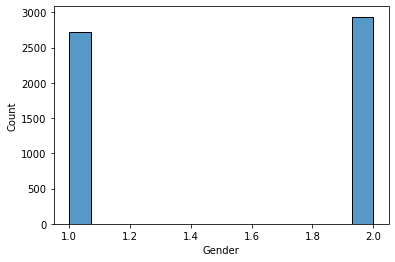

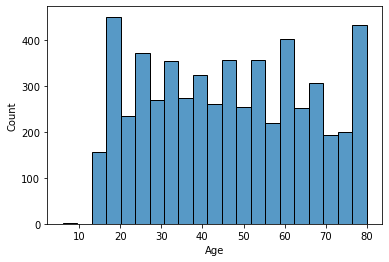

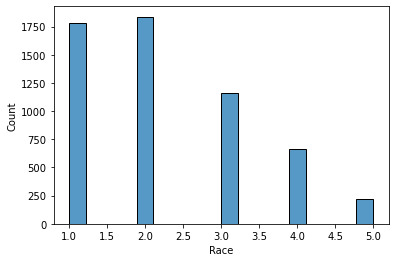

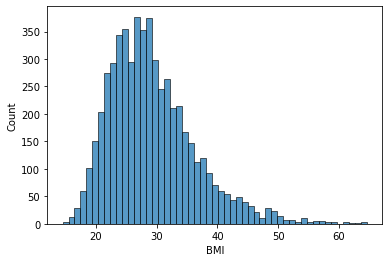

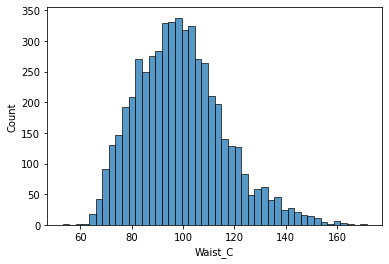

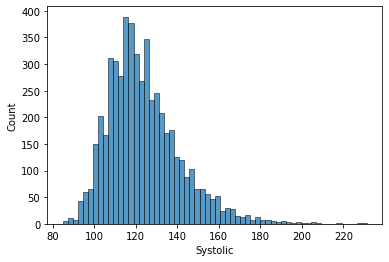

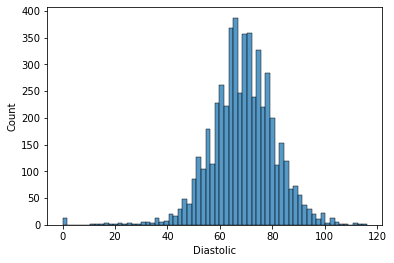

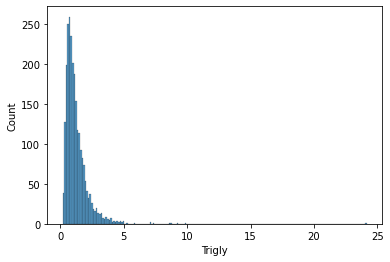

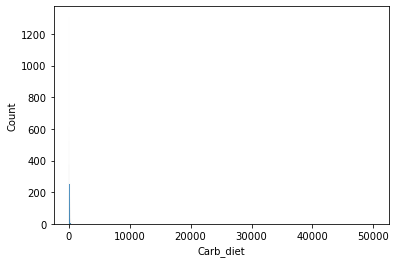

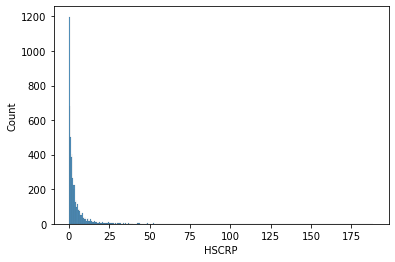

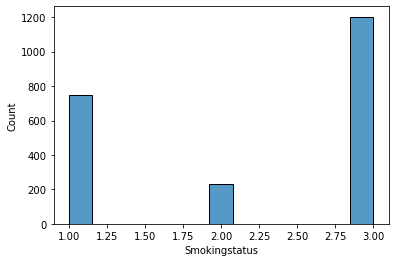

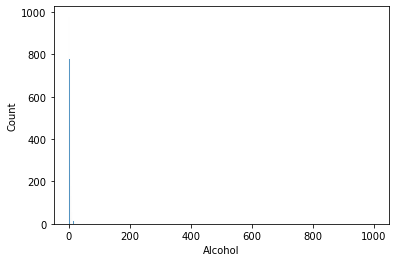

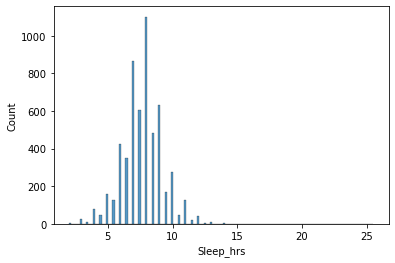

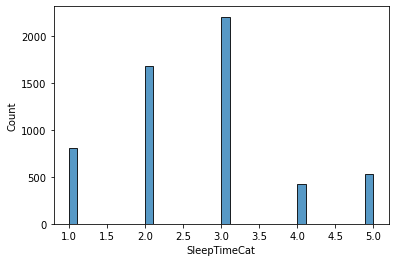

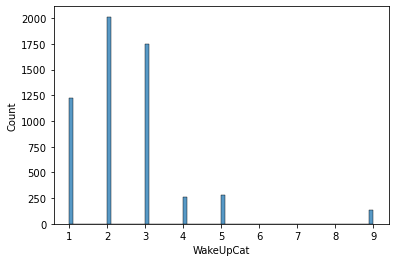

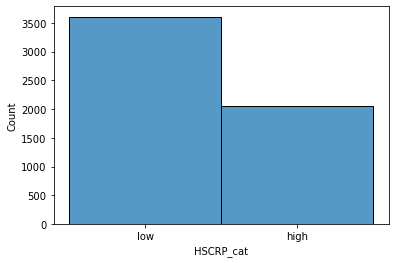

In [8]:
def plot_feature_distributions_hist(df):
    plt.figure(figsize=(15, 8))
    for col in df.columns:
        plt.figure()
        sns.histplot(data =df[df[col].notnull()], x=col)
            
plot_feature_distributions_hist(total_df)

Gender


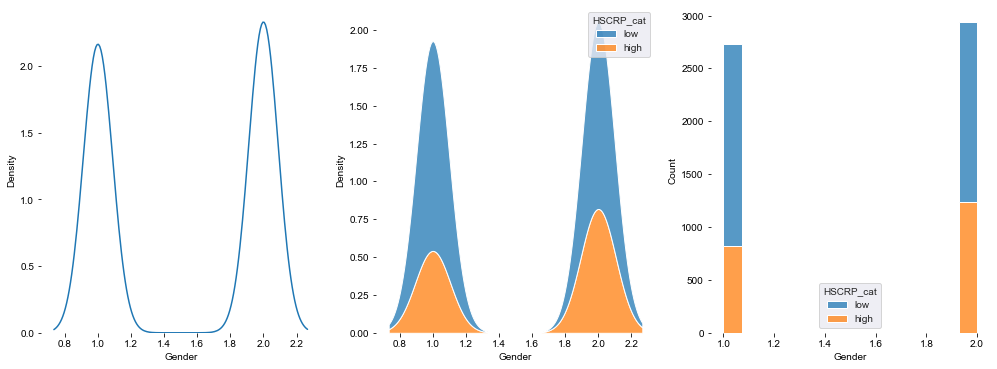

Age


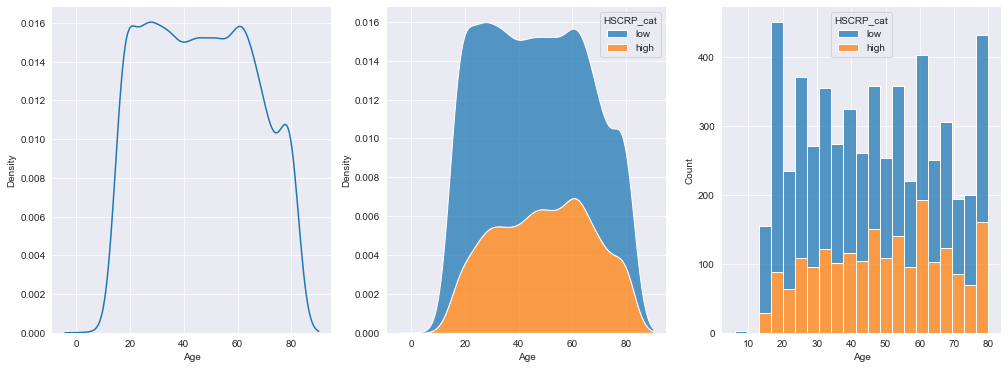

Race


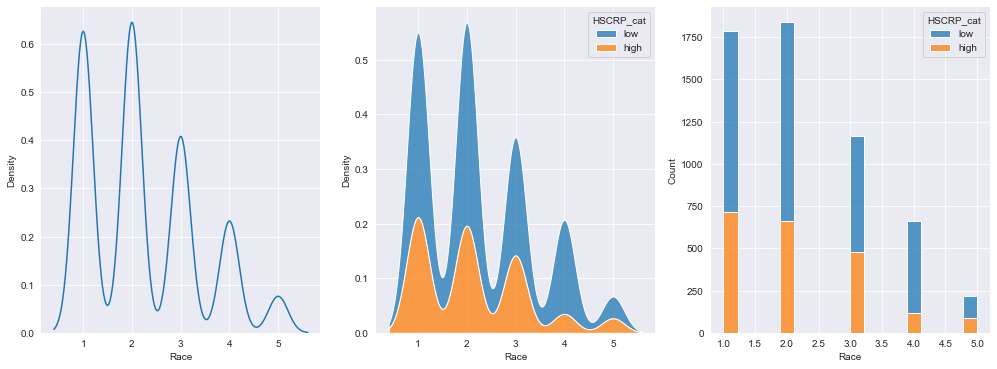

BMI


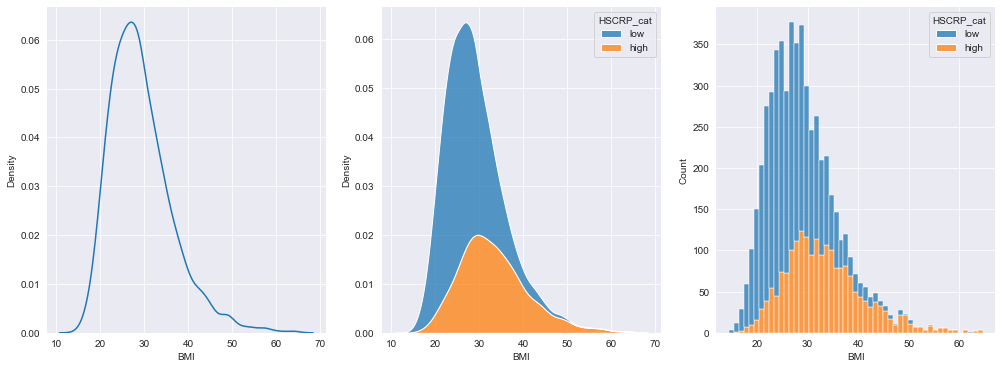

Waist_C


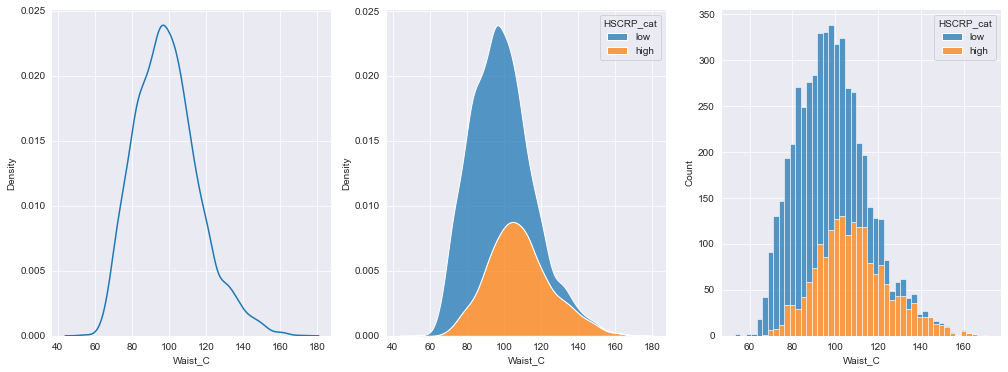

Systolic


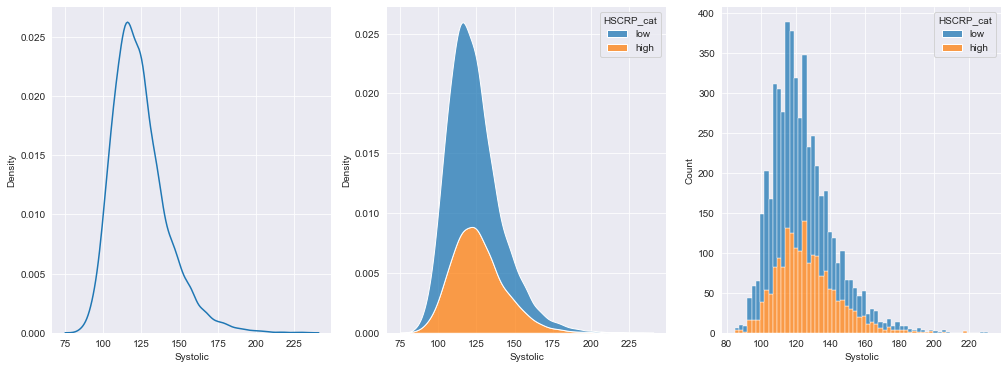

Diastolic


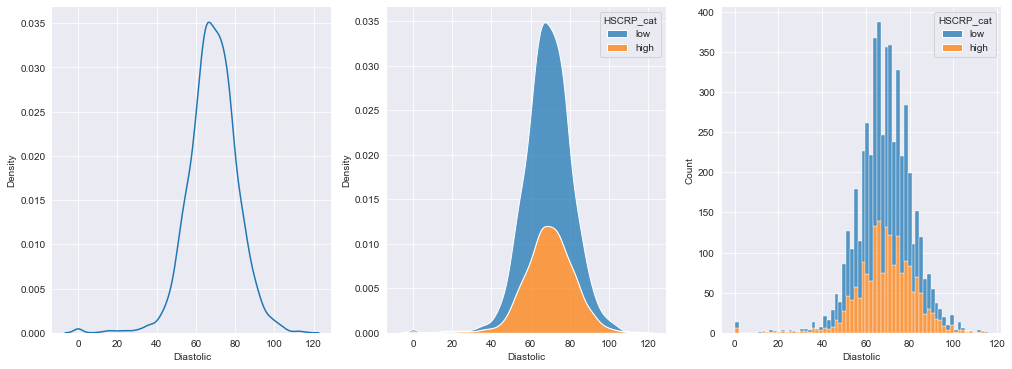

Trigly


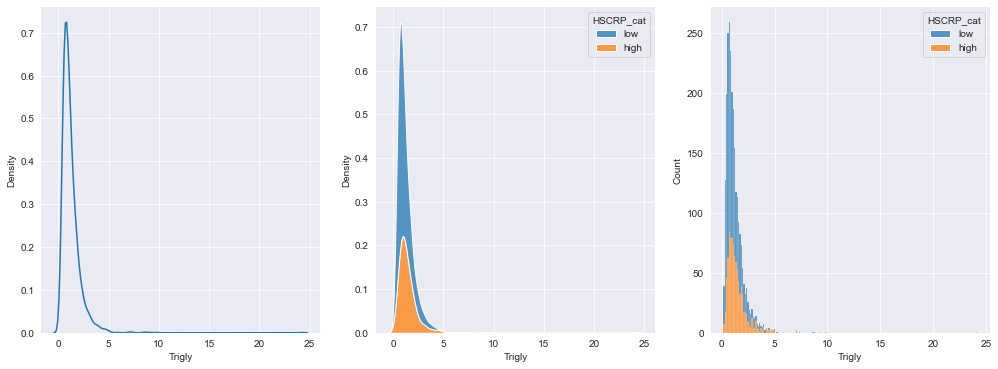

Carb_diet


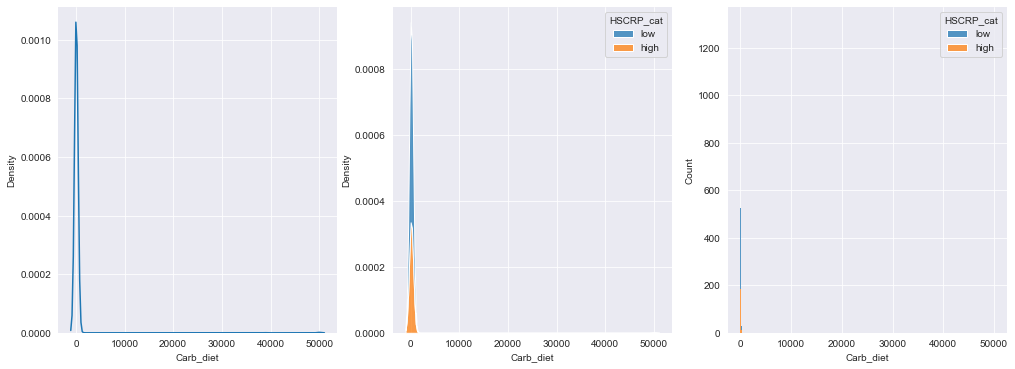

HSCRP


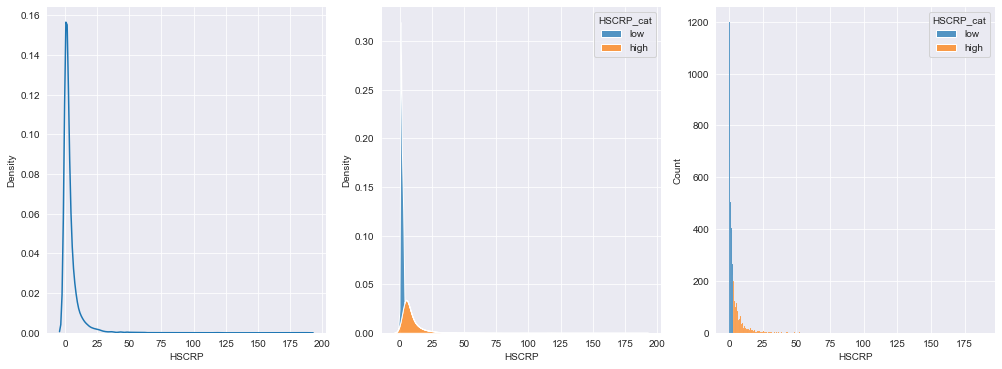

Smokingstatus


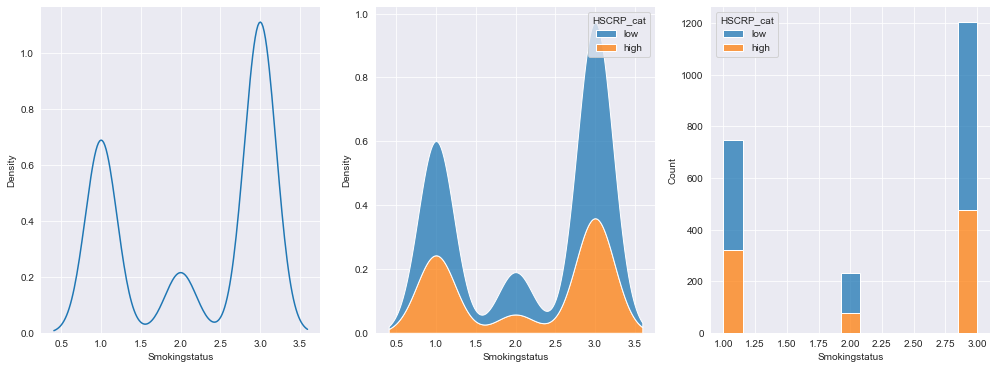

Alcohol


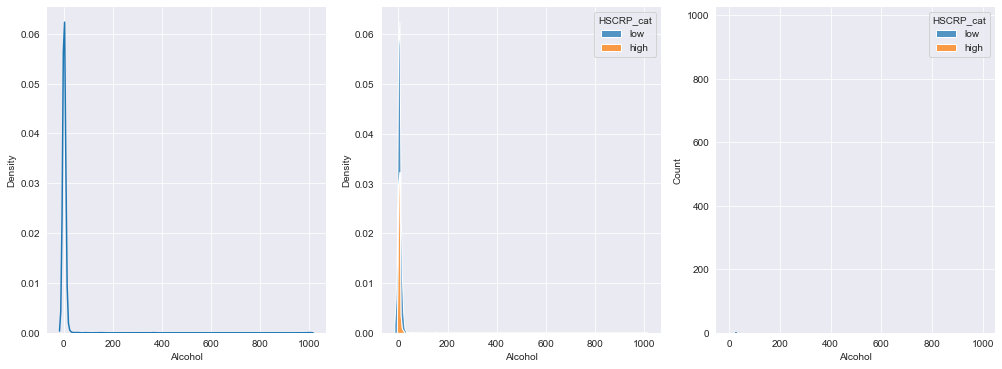

Sleep_hrs


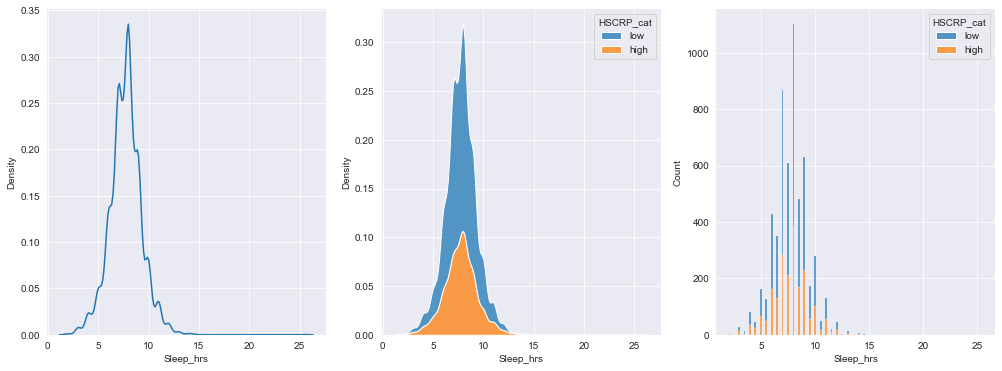

SleepTimeCat


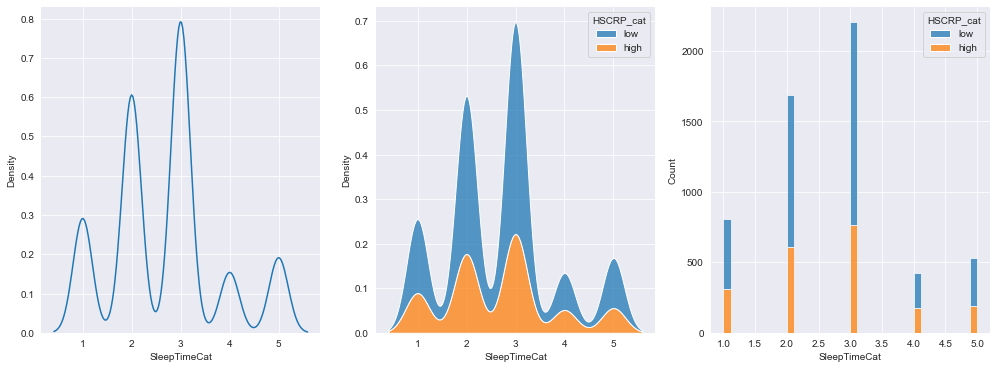

WakeUpCat


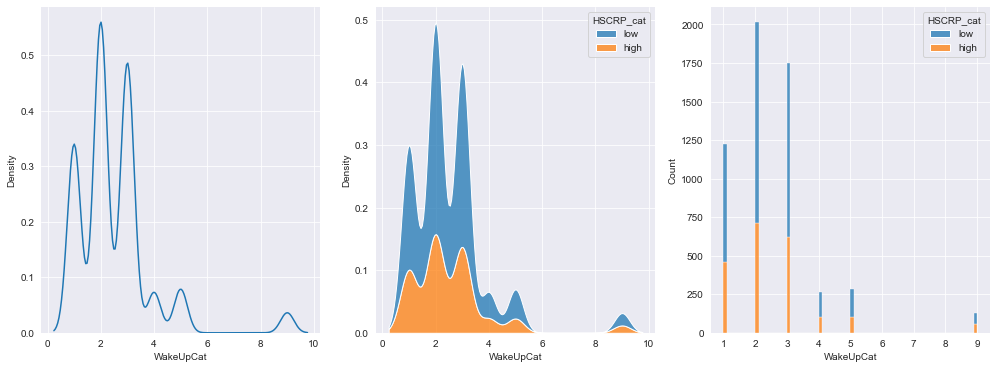

HSCRP_cat
Couldn't plot the density of HSCRP_cat


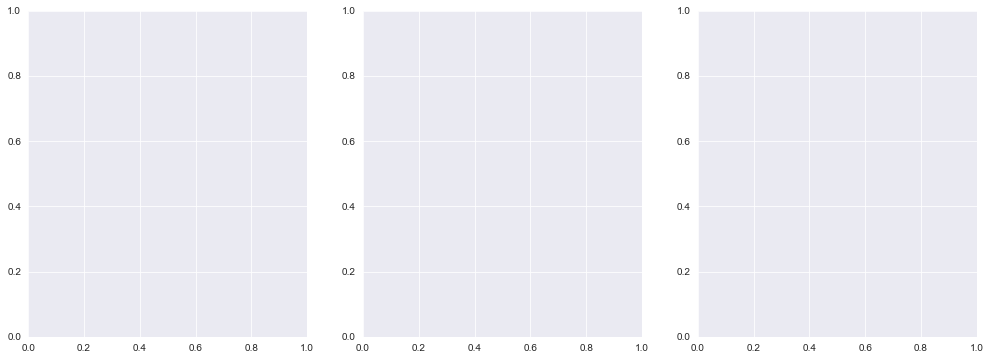

In [9]:
def estimate_distribution(df, col, target):
    fig, ax = plt.subplots(1,3, figsize=(17,6))
    sns.set_style("darkgrid")
    sns.despine(left=True, bottom=True)
    sns.kdeplot(data= df[df[col].notnull()], x=col, ax=ax[0])
    sns.kdeplot(data= df[df[col].notnull()], x=col, hue=target, multiple='stack', ax=ax[1])
    sns.histplot(data= df[df[col].notnull()], x=col, hue=target, multiple='stack', ax=ax[2])
    plt.show()

for col in total_df.columns:
    print(col)
    if ("Cat" not in col) or ("cat" not in col):
        try:
            estimate_distribution(total_df, col, "HSCRP_cat")
        except:
            print(f"Couldn't plot the density of {col}")

Gender has a greater mean when HSCRP is high with mean: 1.6 and stdev: 0.489 
The difference in average is: 0.13
The difference in stdev is: -0.01


<Figure size 1440x792 with 0 Axes>

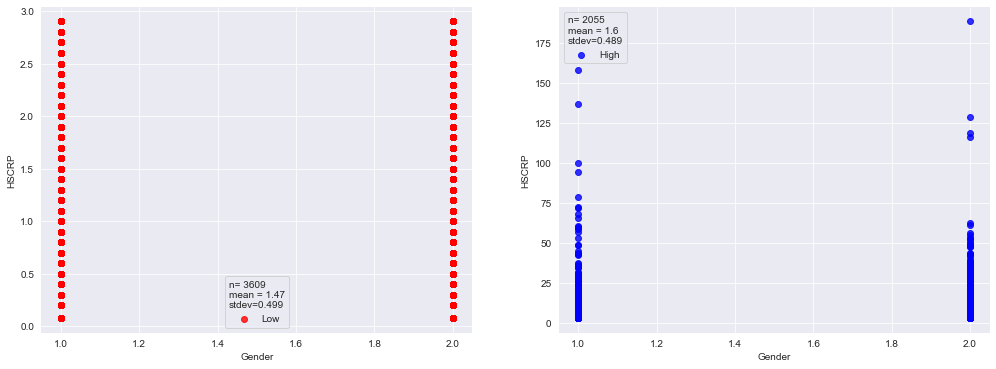

Age has a greater mean when HSCRP is high with mean: 49.36 and stdev: 17.896 
The difference in average is: 4.51
The difference in stdev is: -1.825


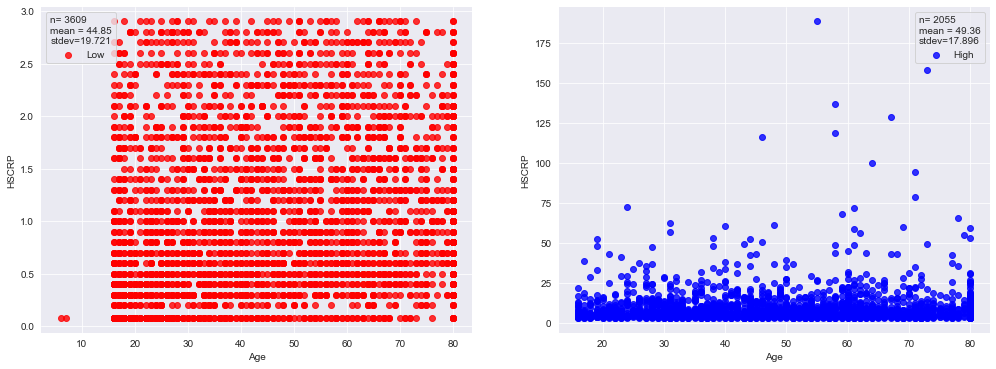

Race has a greater mean when HSCRP is low with mean: 2.3 and stdev: 1.147 
The difference in average is: 0.17
The difference in stdev is: 0.059


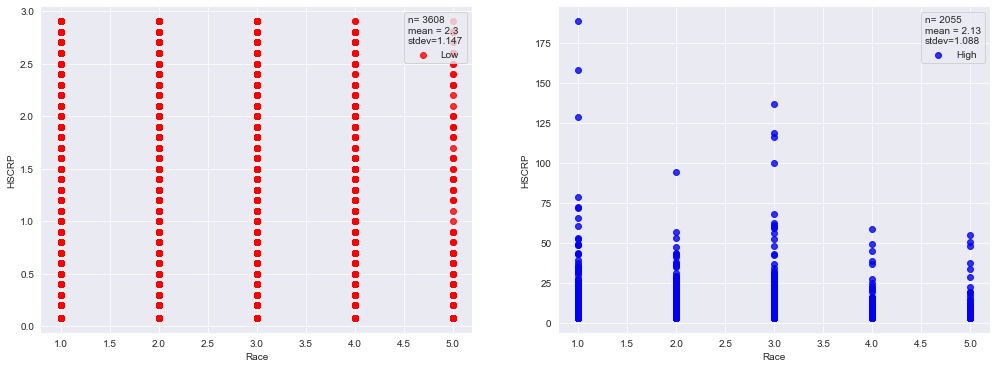

BMI has a greater mean when HSCRP is high with mean: 33.28 and stdev: 7.873 
The difference in average is: 6.31
The difference in stdev is: 2.358


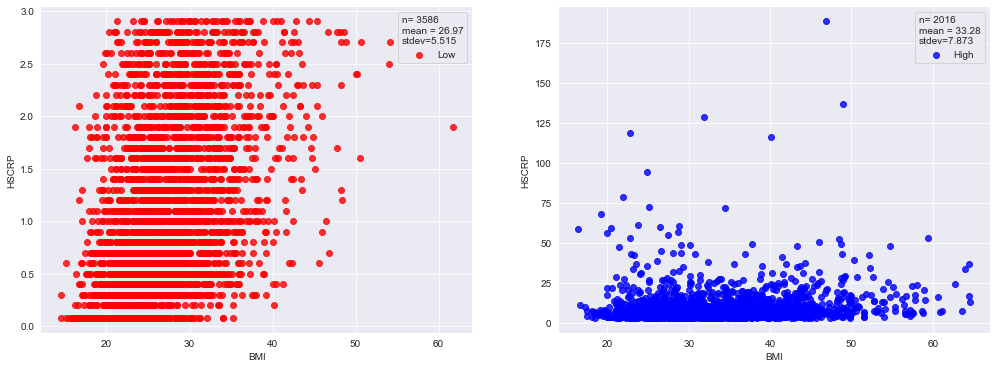

Waist_C has a greater mean when HSCRP is high with mean: 108.37 and stdev: 17.116 
The difference in average is: 14.67
The difference in stdev is: 2.403


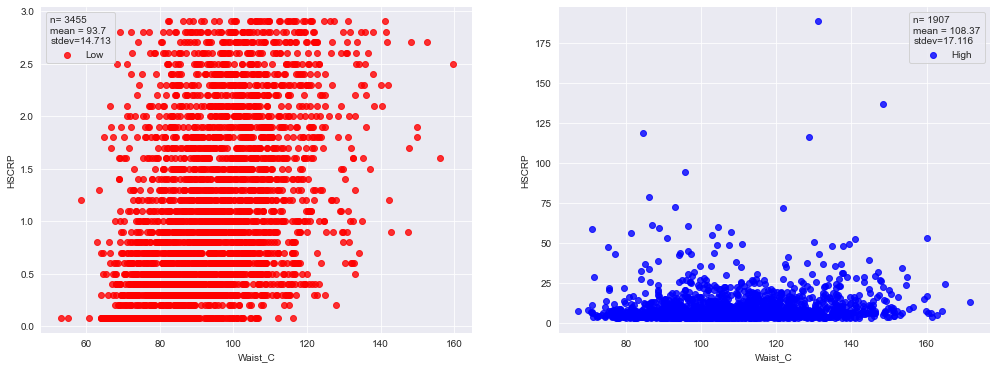

Systolic has a greater mean when HSCRP is high with mean: 126.27 and stdev: 17.655 
The difference in average is: 3.94
The difference in stdev is: 0.163


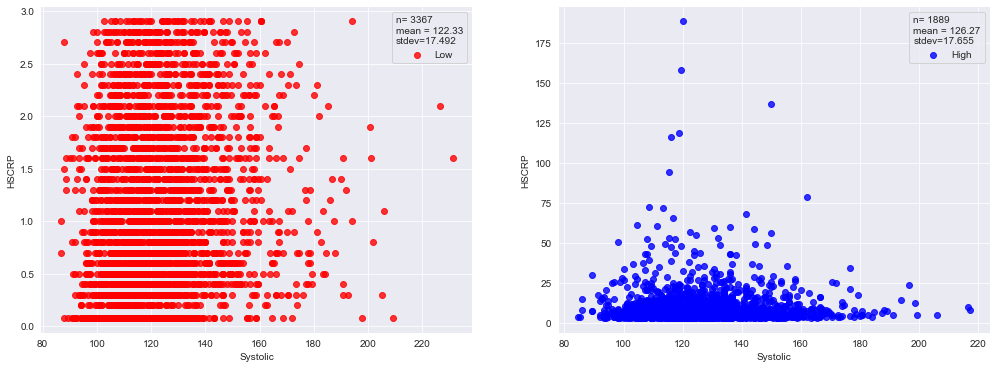

Diastolic has a greater mean when HSCRP is high with mean: 69.22 and stdev: 13.109 
The difference in average is: 0.8
The difference in stdev is: 1.223


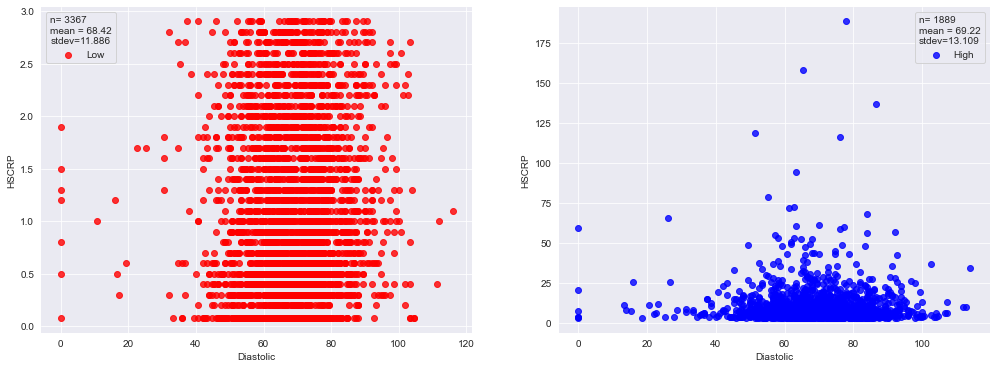

Trigly has a greater mean when HSCRP is high with mean: 1.42 and stdev: 1.184 
The difference in average is: 0.29
The difference in stdev is: 0.369


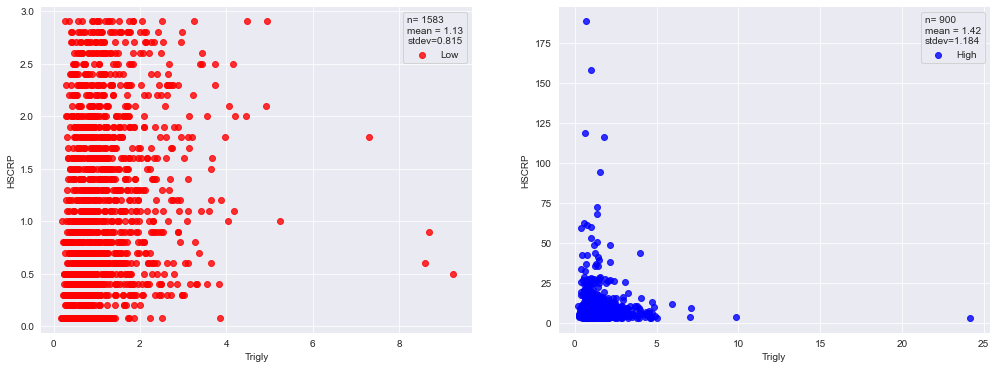

Carb_diet has a greater mean when HSCRP is low with mean: 157.23 and stdev: 2070.422 
The difference in average is: 11.4
The difference in stdev is: 162.892


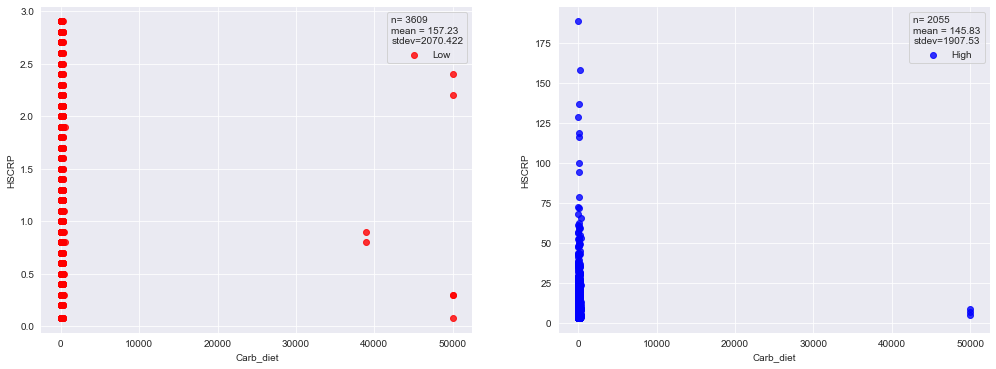

Smokingstatus has a greater mean when HSCRP is low with mean: 2.23 and stdev: 0.909 
The difference in average is: 0.05
The difference in stdev is: -0.03


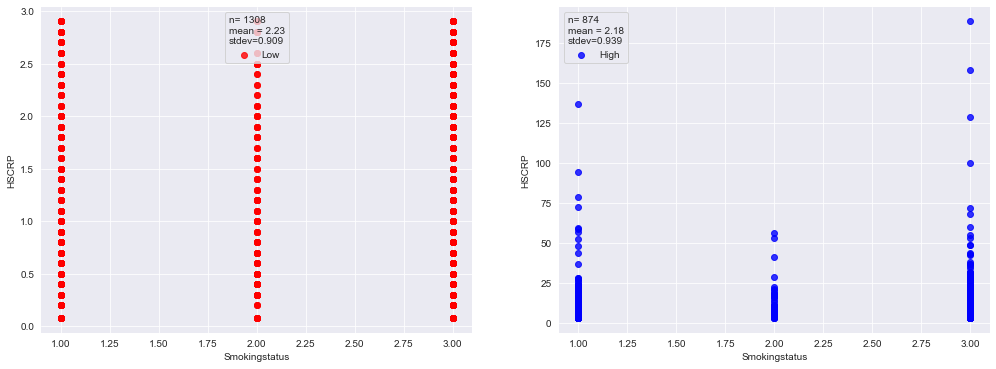

Alcohol has a greater mean when HSCRP is low with mean: 4.36 and stdev: 36.563 
The difference in average is: 1.63
The difference in stdev is: 29.768


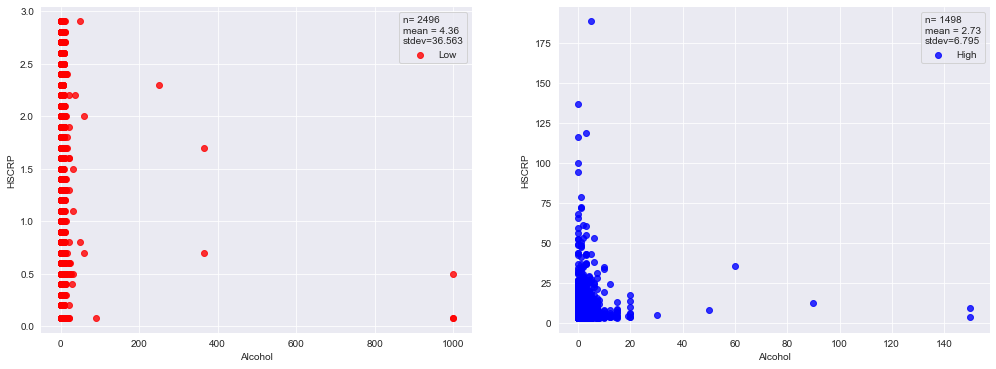

Sleep_hrs has a greater mean when HSCRP is low with mean: 7.74 and stdev: 1.529 
The difference in average is: 0.01
The difference in stdev is: -0.121


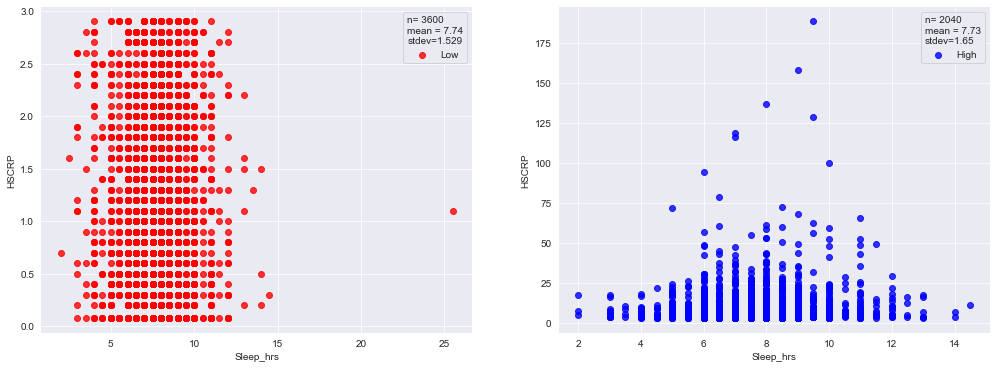

There is no difference in means for SleepTimeCat


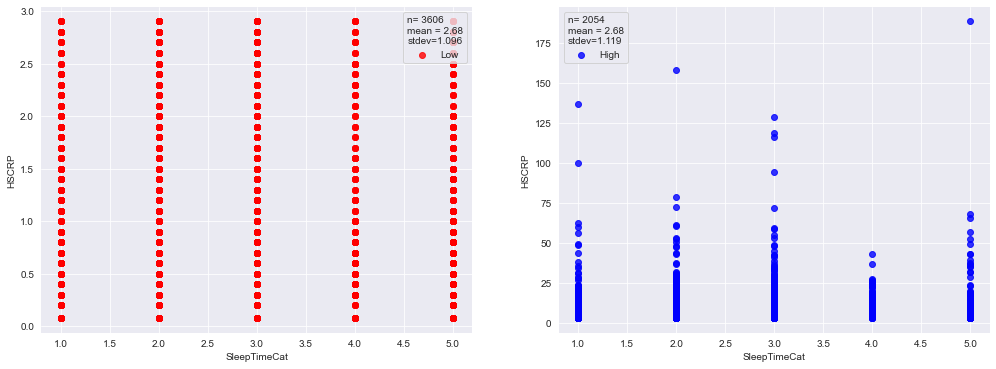

WakeUpCat has a greater mean when HSCRP is high with mean: 2.52 and stdev: 1.484 
The difference in average is: 0.04
The difference in stdev is: 0.09


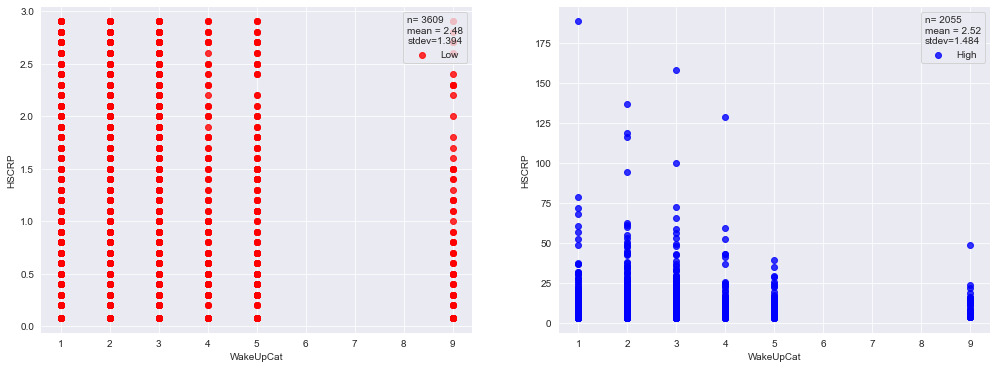

In [10]:
def plot_feature_distributions_reg(df, target):
    plt.figure(figsize=(20, 11))
    for col in df.columns:
        hscrp_low = df[ (df[col].notnull() ) & (df['HSCRP_cat'] == 'low') ]
        hscrp_high = df[ (df[col].notnull() ) & (df['HSCRP_cat'] == 'high') ]
        if target not in col:
            mean_when_low  = round(np.mean(hscrp_low[col]),2)
            mean_when_high = round(np.mean(hscrp_high[col]),2)
            std_when_low = round(np.std(hscrp_low[col]),3)
            std_when_high = round(np.std(hscrp_high[col]),3)

            fig, ax = plt.subplots(1,2, figsize=(17,6))
            ax=ax.flatten()
            sns.set_style("darkgrid")
            sns.despine(left=True, bottom=True)
            sns.regplot(x=col, y=target, data=hscrp_low, color='red', scatter=True, fit_reg=False, ax=ax[0])
            sns.regplot(x=col, y=target, data=hscrp_high, color='blue',scatter=True, fit_reg= False, ax=ax[1])
            ax[0].legend(title= f"n= {len(hscrp_low)}\nmean = {mean_when_low}\nstdev={std_when_low}".replace('[','').replace(']','').replace(',',''), labels=['Low'])
            ax[1].legend(title= f"n= {len(hscrp_high)}\nmean = {mean_when_high}\nstdev={std_when_high}".replace('[','').replace(']','').replace(',',''), labels=['High'])

            if mean_when_low > mean_when_high:
                print(f"{col} has a greater mean when HSCRP is low with mean: {mean_when_low} and stdev: {std_when_low} \nThe difference in average is: {round(mean_when_low-mean_when_high,3)}")
                print(f"The difference in stdev is: {round(std_when_low-std_when_high,3)}")
            elif mean_when_low < mean_when_high:
                print(f"{col} has a greater mean when HSCRP is high with mean: {mean_when_high} and stdev: {std_when_high} \nThe difference in average is: {round(mean_when_high-mean_when_low,3)}")
                print(f"The difference in stdev is: {round(std_when_high-std_when_low,3)}")
            else:
                print(f"There is no difference in means for {col}")


            
        plt.show()
plot_feature_distributions_reg(total_df, 'HSCRP')

# Eliminate Outliers and re-run differences

In [11]:
'''defining outliers as:
1. Sleep hours >= 24
2. Alcohol > 15
3. Carb Diet > 1000

Keeping all HSCRP per https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HSCRP_I.htm

'''

no_outliers_df = total_df[(total_df['Sleep_hrs'] <24)  & (total_df['Alcohol'] < 15) & (total_df['Carb_diet'] < 500)]

Gender has a greater mean when HSCRP is high with mean: 1.55 and stdev: 0.498 
The difference in average is: 0.13
The difference in stdev is: 0.004


<Figure size 1440x792 with 0 Axes>

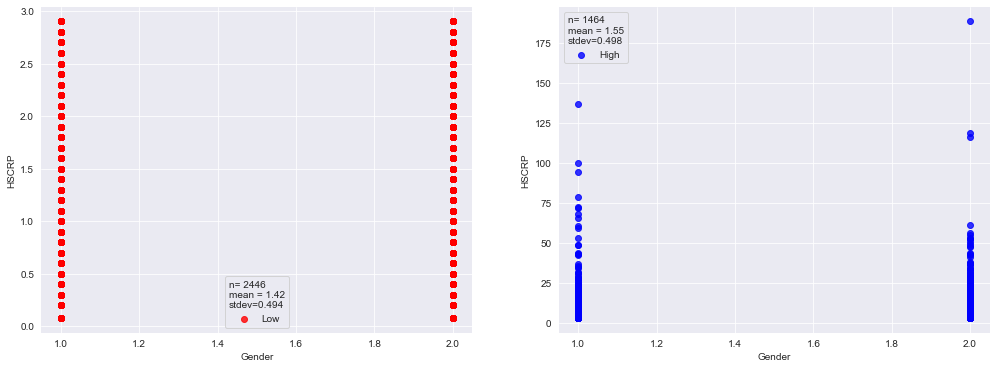

Age has a greater mean when HSCRP is high with mean: 50.44 and stdev: 16.978 
The difference in average is: 2.88
The difference in stdev is: -1.578


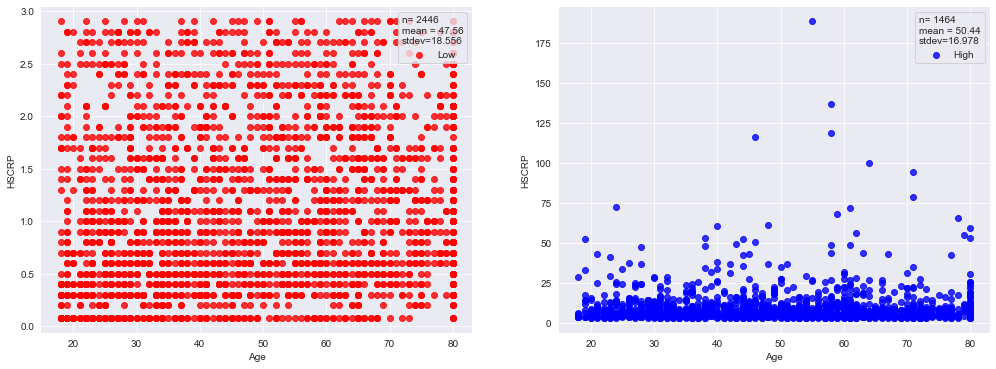

Race has a greater mean when HSCRP is low with mean: 2.24 and stdev: 1.103 
The difference in average is: 0.1
The difference in stdev is: 0.05


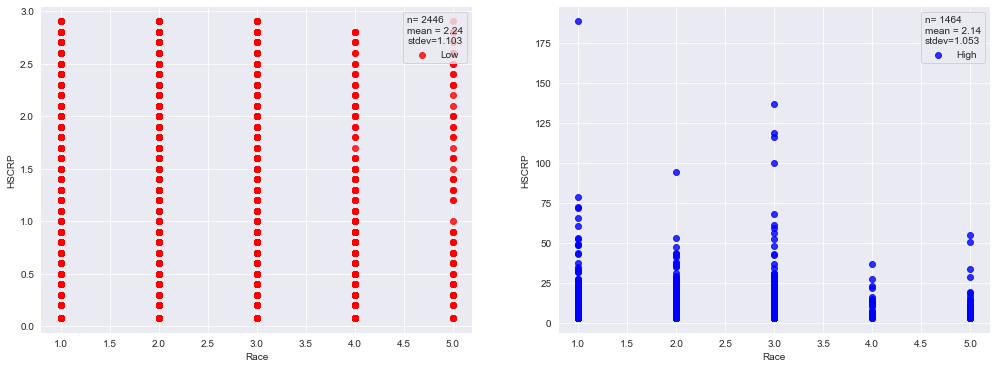

BMI has a greater mean when HSCRP is high with mean: 33.38 and stdev: 7.96 
The difference in average is: 5.99
The difference in stdev is: 2.484


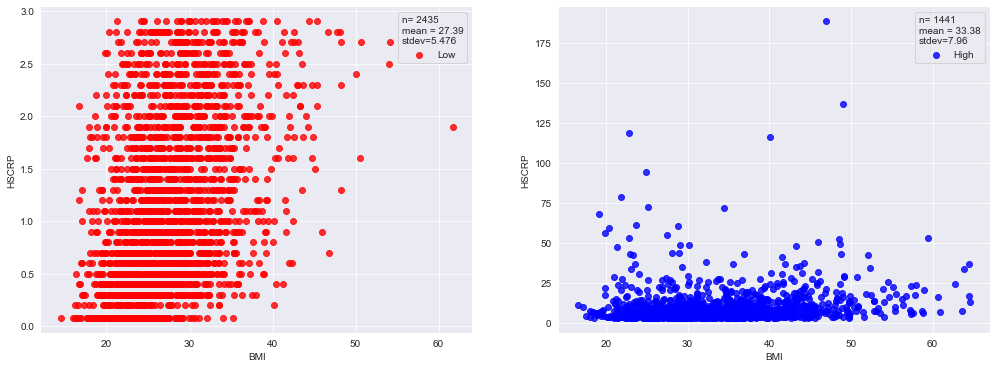

Waist_C has a greater mean when HSCRP is high with mean: 109.21 and stdev: 17.242 
The difference in average is: 13.81
The difference in stdev is: 2.841


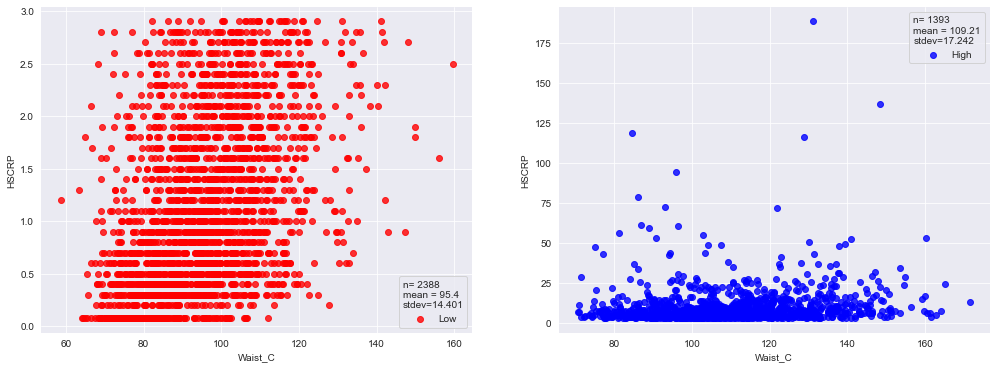

Systolic has a greater mean when HSCRP is high with mean: 126.5 and stdev: 17.557 
The difference in average is: 2.86
The difference in stdev is: -0.003


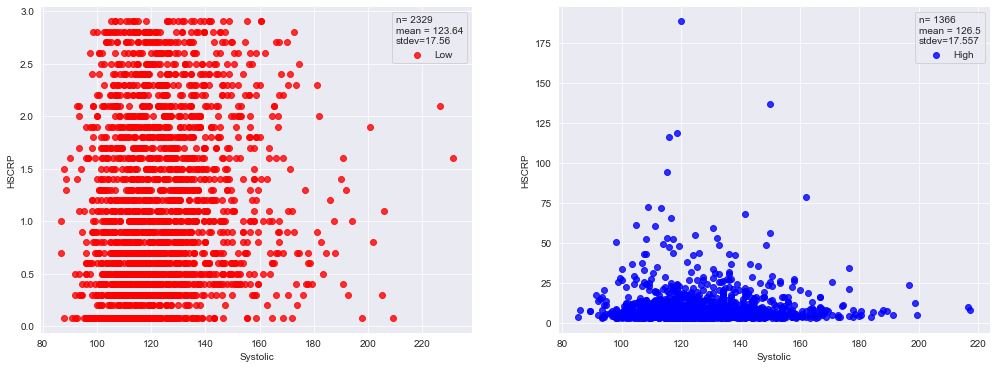

Diastolic has a greater mean when HSCRP is high with mean: 69.55 and stdev: 13.481 
The difference in average is: 0.28
The difference in stdev is: 1.675


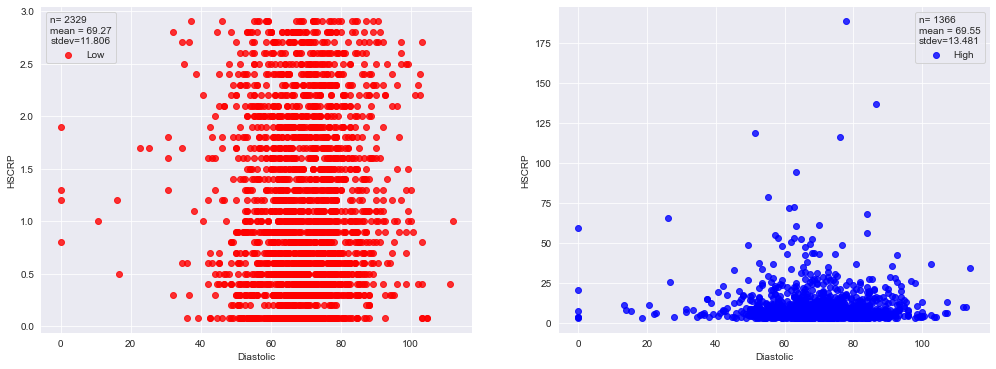

Trigly has a greater mean when HSCRP is high with mean: 1.45 and stdev: 1.241 
The difference in average is: 0.26
The difference in stdev is: 0.378


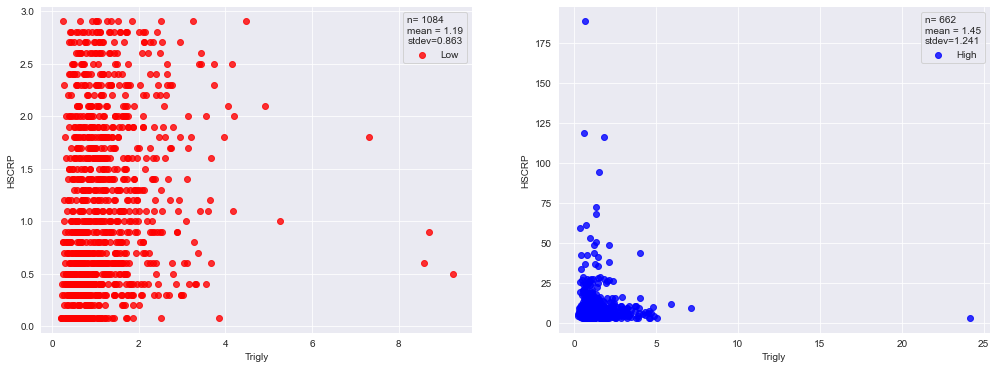

Carb_diet has a greater mean when HSCRP is high with mean: 78.0 and stdev: 68.871 
The difference in average is: 2.32
The difference in stdev is: -3.662


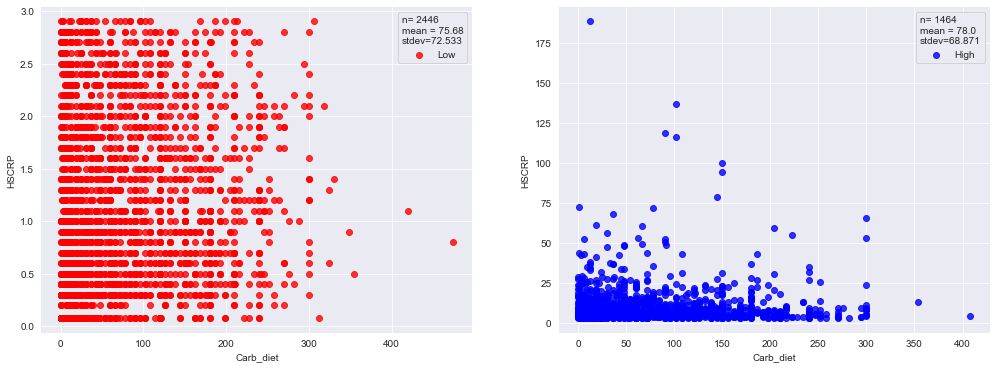

Smokingstatus has a greater mean when HSCRP is low with mean: 2.25 and stdev: 0.905 
The difference in average is: 0.06
The difference in stdev is: -0.032


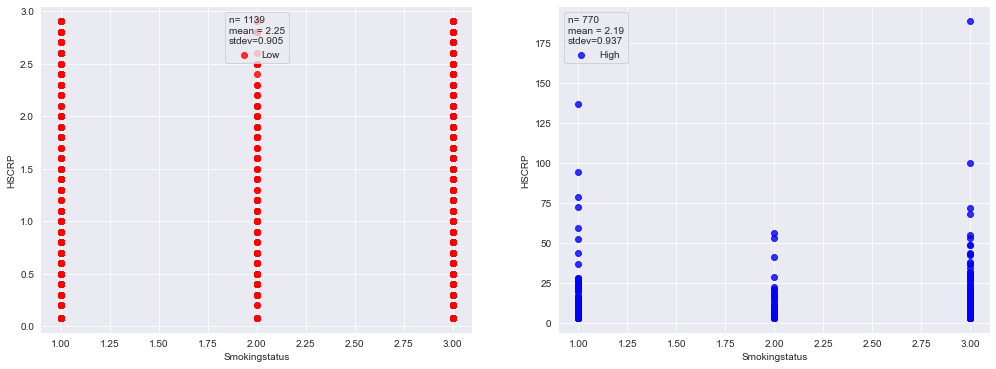

Alcohol has a greater mean when HSCRP is low with mean: 2.46 and stdev: 2.339 
The difference in average is: 0.26
The difference in stdev is: 0.051


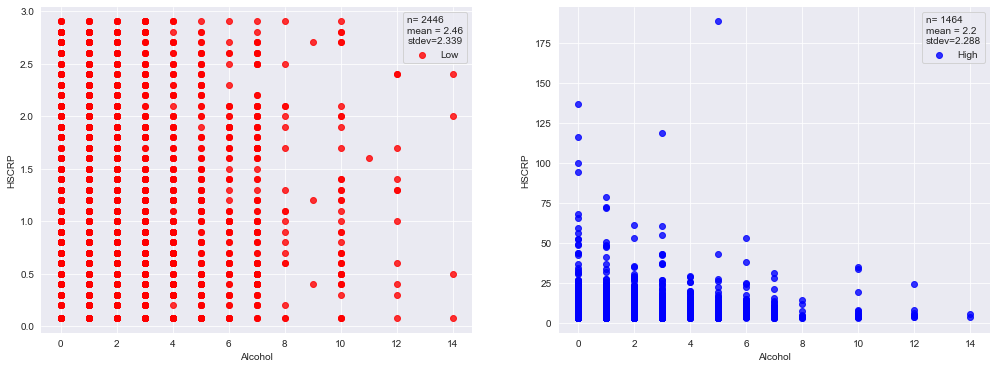

Sleep_hrs has a greater mean when HSCRP is low with mean: 7.71 and stdev: 1.513 
The difference in average is: 0.04
The difference in stdev is: -0.073


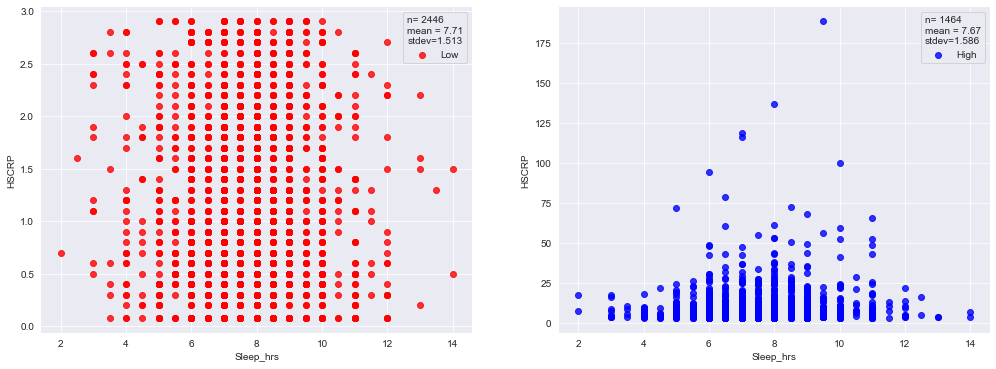

There is no difference in means for SleepTimeCat


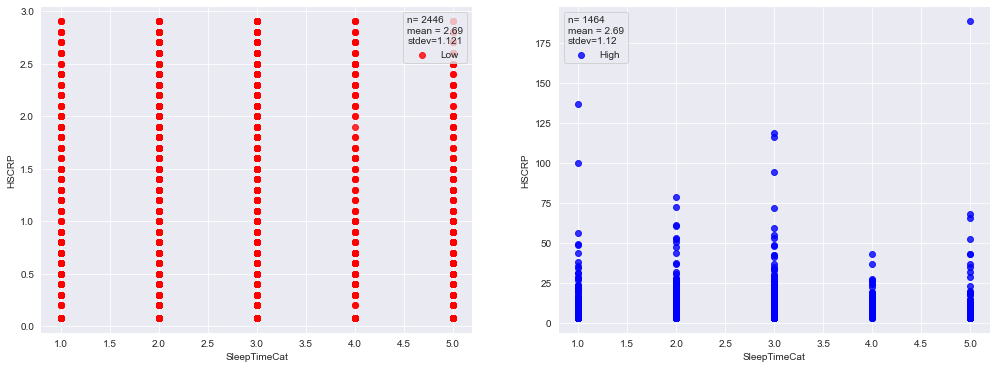

WakeUpCat has a greater mean when HSCRP is high with mean: 2.51 and stdev: 1.521 
The difference in average is: 0.06
The difference in stdev is: 0.124


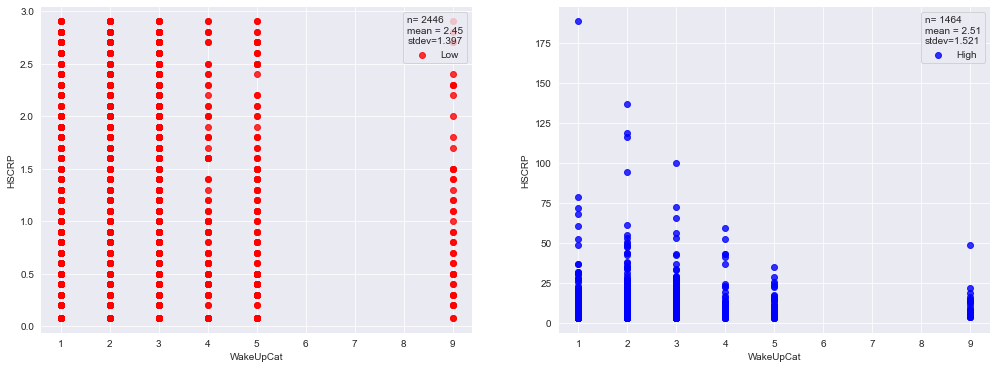

In [12]:
plot_feature_distributions_reg(no_outliers_df, 'HSCRP')

# Compare variables of interest to determine if difference is statistically significant

Carb_diet


Ttest_indResult(statistic=-0.9855021346879054, pvalue=0.3244384922497332)

Carb_diet has a greater mean when HSCRP is high with mean: 78.0 and stdev: 68.871 
The difference in average is: 2.32
The difference in stdev is: -3.662


<Figure size 1440x792 with 0 Axes>

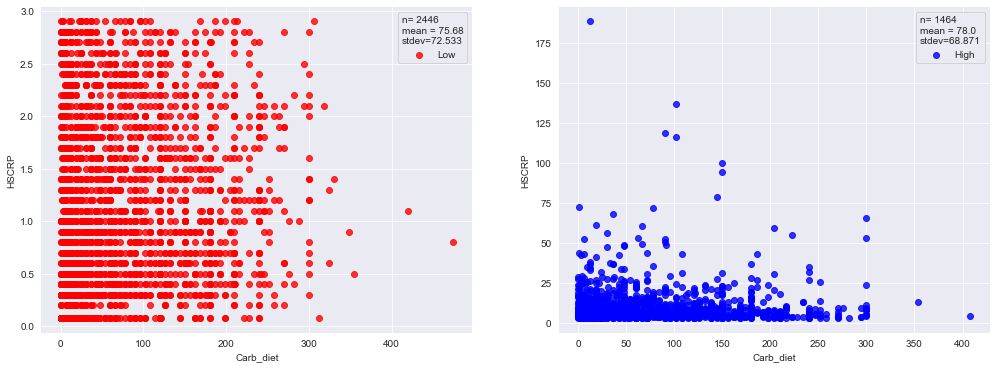

Systolic


Ttest_indResult(statistic=-4.778120523515486, pvalue=1.8382605243261312e-06)

Systolic has a greater mean when HSCRP is high with mean: 126.5 and stdev: 17.557 
The difference in average is: 2.86
The difference in stdev is: -0.003


<Figure size 1440x792 with 0 Axes>

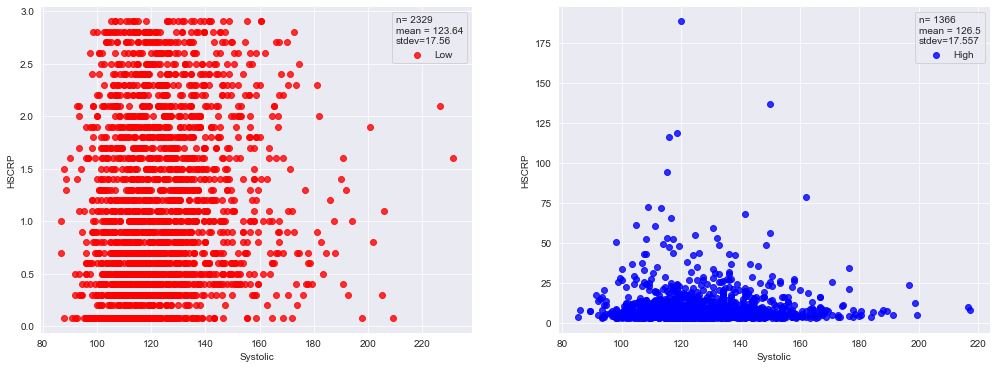

Waist_C


Ttest_indResult(statistic=-26.411190910641416, pvalue=3.2516996593323586e-141)

Waist_C has a greater mean when HSCRP is high with mean: 109.21 and stdev: 17.242 
The difference in average is: 13.81
The difference in stdev is: 2.841


<Figure size 1440x792 with 0 Axes>

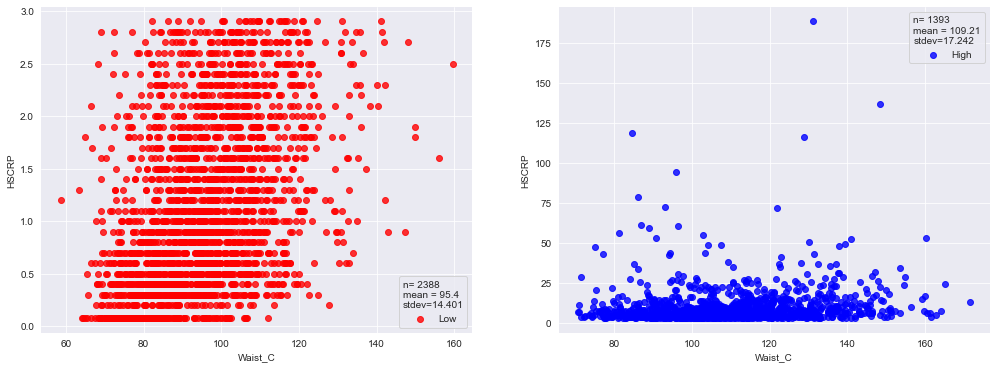

BMI


Ttest_indResult(statistic=-27.670827210912748, pvalue=5.98852643879711e-154)

BMI has a greater mean when HSCRP is high with mean: 33.38 and stdev: 7.96 
The difference in average is: 5.99
The difference in stdev is: 2.484


<Figure size 1440x792 with 0 Axes>

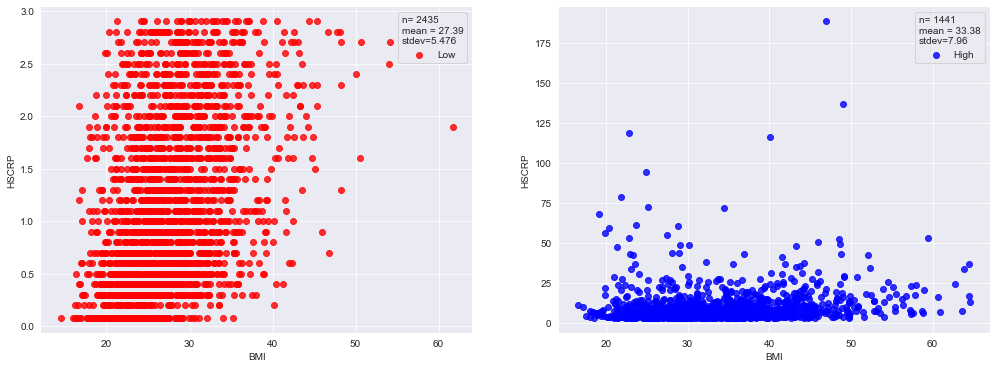

Age


Ttest_indResult(statistic=-4.851912419247005, pvalue=1.270462508308115e-06)

Age has a greater mean when HSCRP is high with mean: 50.44 and stdev: 16.978 
The difference in average is: 2.88
The difference in stdev is: -1.578


<Figure size 1440x792 with 0 Axes>

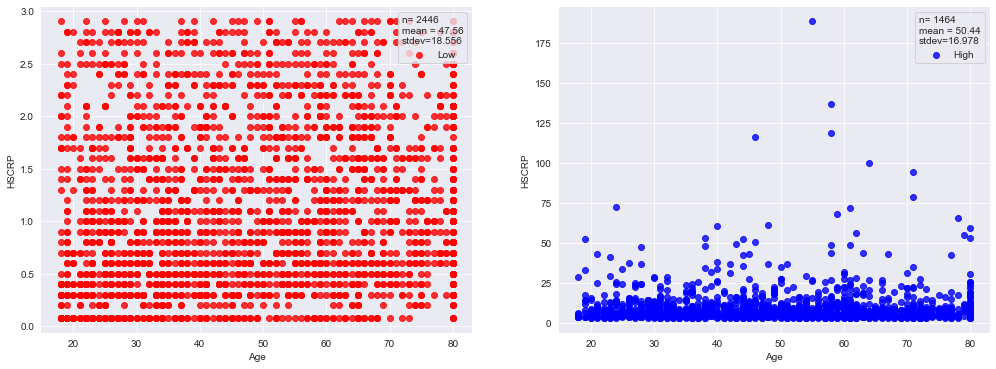

In [13]:
variables_to_test = ['Carb_diet', 'Systolic', 'Waist_C', 'BMI', 'Age']

low_HSCRP = no_outliers_df[no_outliers_df['HSCRP_cat'] == 'low']
high_HSCRP = no_outliers_df[no_outliers_df['HSCRP_cat'] == 'high']

for var in variables_to_test:
    print(var)
    display(stats.ttest_ind(low_HSCRP[var].dropna(), high_HSCRP[var].dropna()))

    plot_feature_distributions_reg(pd.DataFrame(no_outliers_df[[var,'HSCRP_cat', 'HSCRP']]), 'HSCRP')

# Plot Correlation and find related features

<AxesSubplot:>

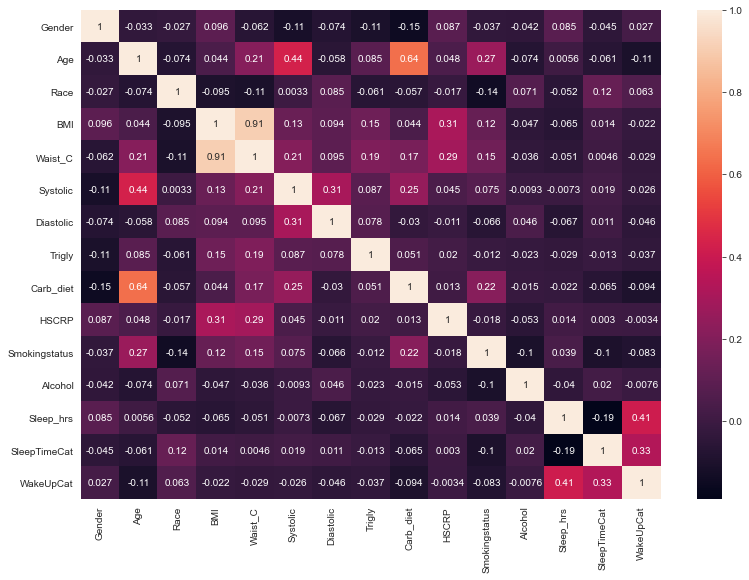

In [14]:
plt.figure(figsize=(13,9))
sns.heatmap(no_outliers_df.corr(), annot=True)

None

None

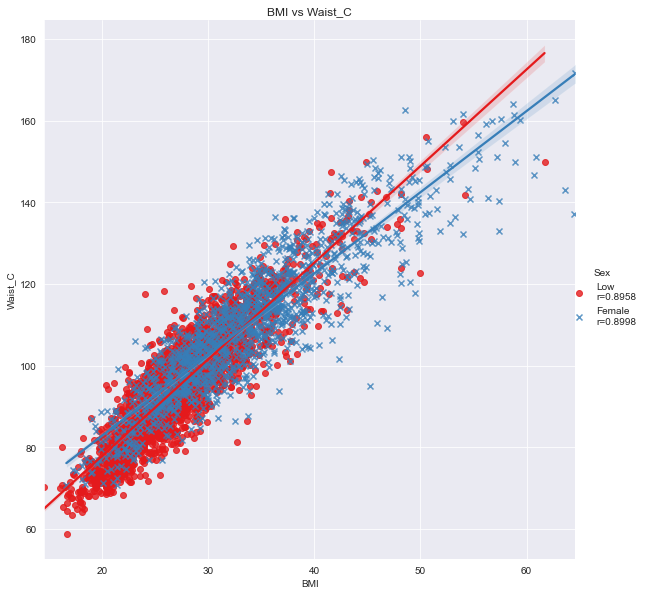

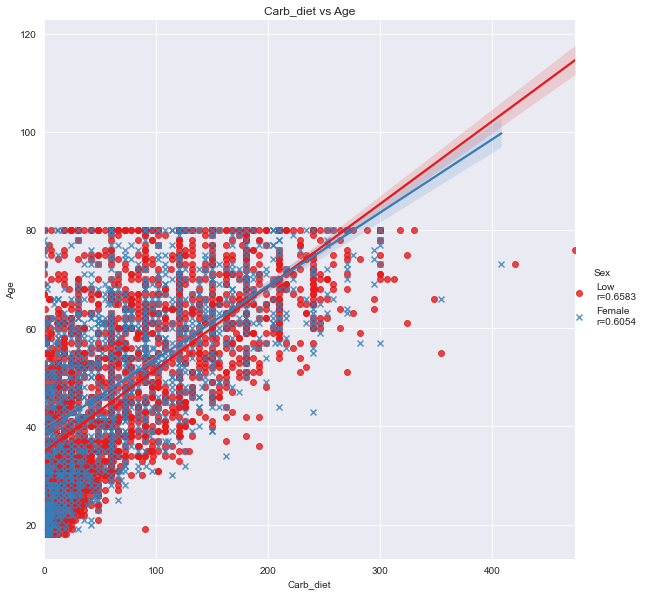

In [15]:
def plot_linear_relationship(data, x, y, hue=None):
    lmplot = sns.lmplot(x=x, y=y, hue=hue, data=data,markers=["o", "x"], palette="Set1", height=8, aspect=1)
    legend = lmplot._legend

    legend.set_title("Sex")
    for t, l in zip(legend.texts,(
        f"Low\nr={round(data[data[hue]=='low'][x].corr(data[data[hue]== 'low'][y]),4)}", 
        f"Female\nr={round(data[data[hue]=='high'][x].corr(data[data[hue]== 'high'][y]),4)}")):
        t.set_text(l)
    plt.title(f"{x} vs {y}")



display(plot_linear_relationship(data=no_outliers_df, x='BMI', y='Waist_C', hue='HSCRP_cat'))
display(plot_linear_relationship(data=no_outliers_df, x='Carb_diet', y='Age', hue='HSCRP_cat'))

In [16]:
def compare_predictors(data, var1, var2, target):
    var1_log_reg = sm.OLS(data[target], sm.add_constant(data[var1])).fit()
    display(var1_log_reg.summary())
    display(sns.lmplot(data = data, x=var1, y=target, hue= 'HSCRP_cat'))

    var2_log_reg = sm.OLS(data[target], sm.add_constant(data[var2])).fit()
    display(var2_log_reg.summary())
    display(sns.lmplot(data = data, x=var2, y=target, hue= 'HSCRP_cat'))



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HSCRP   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     42.00
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           1.57e-10
Time:                        21:34:11   Log-Likelihood:                -3020.7
No. Observations:                 820   AIC:                             6045.
Df Residuals:                     818   BIC:                             6055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9561      1.510     -3.282      0.001      -7.920      -1.992
BMI            0.3224      0.050      6.481      0.000       0.225       0.420
==============================================================================
Omnibus:                     1371.915   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           876106.274
Skew:                          10.394   Prob(JB):                         0.00
Kurtosis:                     161.776   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HSCRP   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     31.60
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           2.59e-08
Time:                        21:34:12   Log-Likelihood:                -3025.7
No. Observations:                 820   AIC:                             6055.
Df Residuals:                     818   BIC:                             6065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3520      2.150     -3.420      0.001     -11.572      -3.132
Waist_C        0.1169      0.021      5.622      0.000       0.076       0.158
==============================================================================
Omnibus:                     1376.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           903696.481
Skew:                          10.447   Prob(JB):                         0.00
Kurtosis:                     164.286   Cond. No.                         656.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HSCRP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09308
Date:                Sun, 23 Oct 2022   Prob (F-statistic):              0.760
Time:                        21:34:12   Log-Likelihood:                -3041.2
No. Observations:                 820   AIC:                             6086.
Df Residuals:                     818   BIC:                             6096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7106      0.541      8.700      0.000       3.648       5.773
Carb_diet     -0.0015      0.005     -0.305      0.760      -0.011       0.008
==============================================================================
Omnibus:                     1365.167   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           878834.209
Skew:                          10.278   Prob(JB):                         0.00
Kurtosis:                     162.058   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HSCRP   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.147
Date:                Sun, 23 Oct 2022   Prob (F-statistic):              0.143
Time:                        21:34:13   Log-Likelihood:                -3040.1
No. Observations:                 820   AIC:                             6084.
Df Residuals:                     818   BIC:                             6094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0124      1.126      2.675      0.008       0.802       5.223
Age            0.0302      0.021      1.465      0.143      -0.010       0.071
==============================================================================
Omnibus:                     1366.474   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           885800.910
Skew:                          10.296   Prob(JB):                         0.00
Kurtosis:                     162.693   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

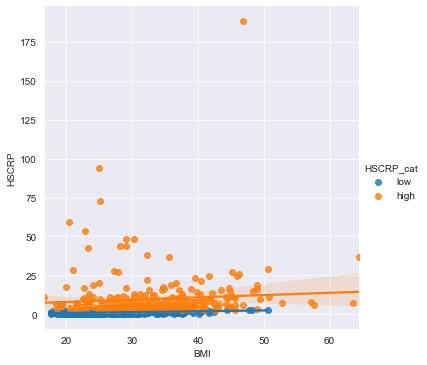

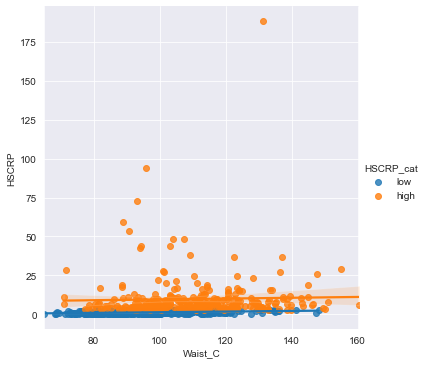

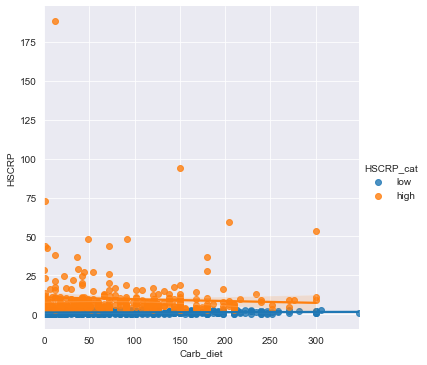

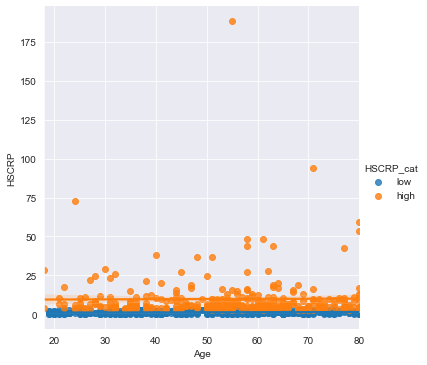

In [17]:
compare_predictors(data= no_outliers_df.dropna(), var1='BMI', var2='Waist_C', target='HSCRP')
compare_predictors(data= no_outliers_df.dropna(), var1='Carb_diet', var2='Age', target='HSCRP')

# Set Features for Prediction and Imputation

1. Select features for prediction
2. Find number of missing samples per feature
3. Set features to impute 

In [18]:
'''original variables : 'Gender', 'Age', 'Race', 'BMI', 'Waist_C', 'Systolic', 'Diastolic',
       'Trigly', 'Carb_diet',  'Smokingstatus', 'Alcohol', 'Sleep_hrs',
       'SleepTimeCat', 'WakeUpCat' '''

predict_features = ['Gender', 'Age',  'BMI',  'Systolic', 'Diastolic','Alcohol', 'Sleep_hrs', 'SleepTimeCat', 'WakeUpCat', 'HSCRP_cat']


display(no_outliers_df[['Gender', 'Age', 'Race', 'BMI',  'Systolic', 'Diastolic','Alcohol', 'Sleep_hrs', 'SleepTimeCat', 'WakeUpCat']].isna().sum())


features_to_impute = ['BMI',  'Systolic', 'Diastolic']

model_df = no_outliers_df[predict_features]

Gender            0
Age               0
Race              0
BMI              34
Systolic        215
Diastolic       215
Alcohol           0
Sleep_hrs         0
SleepTimeCat      0
WakeUpCat         0
dtype: int64

In [19]:
def impute_data(data):
    mean_imputed = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(data), 
                                                        columns=data.columns, index=data.index)

    median_imputed =pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(data), 
                                                        columns=data.columns, index=data.index)
    
    lin_reg_imputed = pd.DataFrame(IterativeImputer(estimator = LinearRegression(),
                                                        max_iter=50).fit_transform(data),
                                                        columns=data.columns, index=data.index)
    lasso_reg_imputed = pd.DataFrame(IterativeImputer(estimator = Lasso(),
                                                        max_iter=50).fit_transform(data),
                                                        columns=data.columns, index=data.index)
    ridge_reg_imputed = pd.DataFrame(IterativeImputer(estimator = Ridge(),
                                                        max_iter=50).fit_transform(data),
                                                        columns=data.columns, index=data.index)                                           

    dec_iterative_imputed = pd.DataFrame(IterativeImputer(estimator=DecisionTreeRegressor(),
                                                        max_iter=50).fit_transform(data),
                                                        columns=data.columns, index=data.index)                                                 
    gb_iterative_imputed = pd.DataFrame(IterativeImputer(estimator=GradientBoostingRegressor(),
                                                        max_iter=50).fit_transform(data),
                                                        columns=data.columns, index=data.index)   
    knn_imputed = pd.DataFrame(KNNImputer(n_neighbors=int(len(data.columns)**0.5), 
                                                        weights='uniform', metric='nan_euclidean').fit_transform(data),
                                                        columns=data.columns, index=data.index)
                                

    return mean_imputed, median_imputed,lin_reg_imputed, lasso_reg_imputed,ridge_reg_imputed ,dec_iterative_imputed,gb_iterative_imputed ,knn_imputed

Gender            0
Age               0
BMI             256
Systolic        256
Diastolic       256
Alcohol           0
Sleep_hrs         0
SleepTimeCat      0
WakeUpCat         0
dtype: int64


/Users/ryan/opt/anaconda3/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/ryan/opt/anaconda3/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


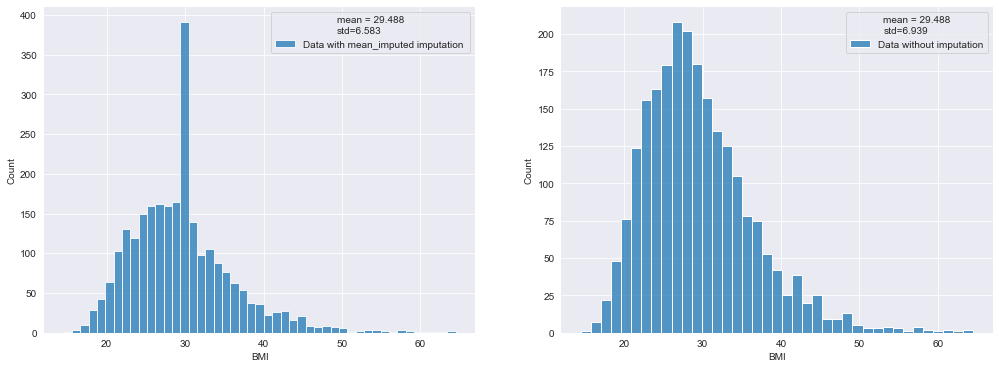

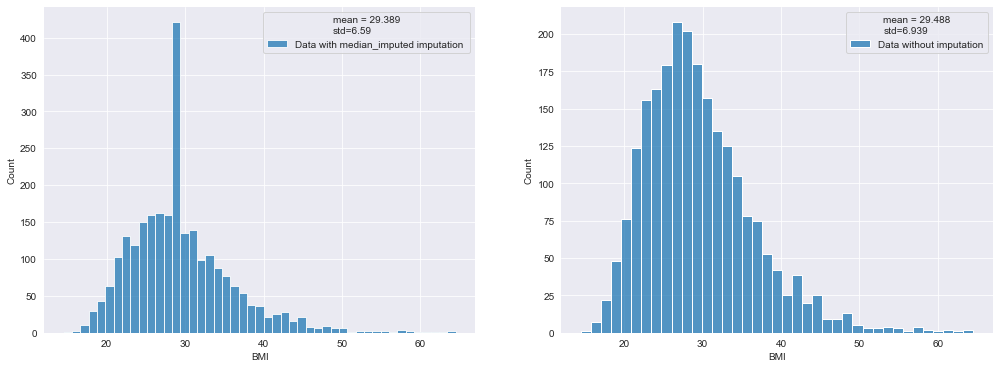

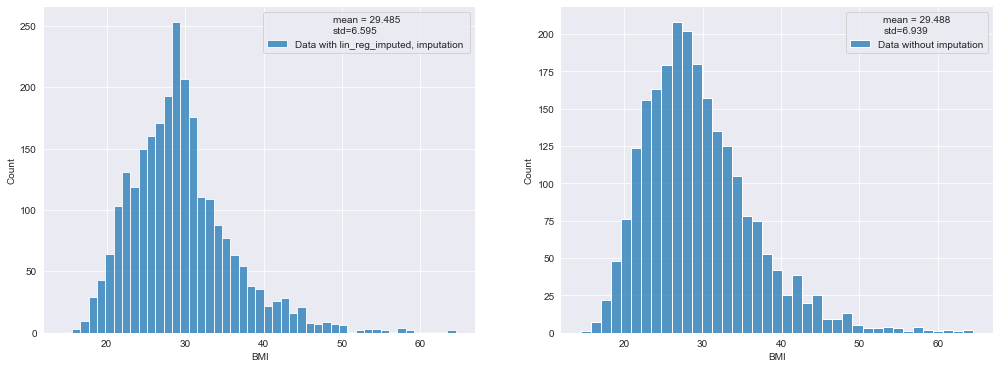

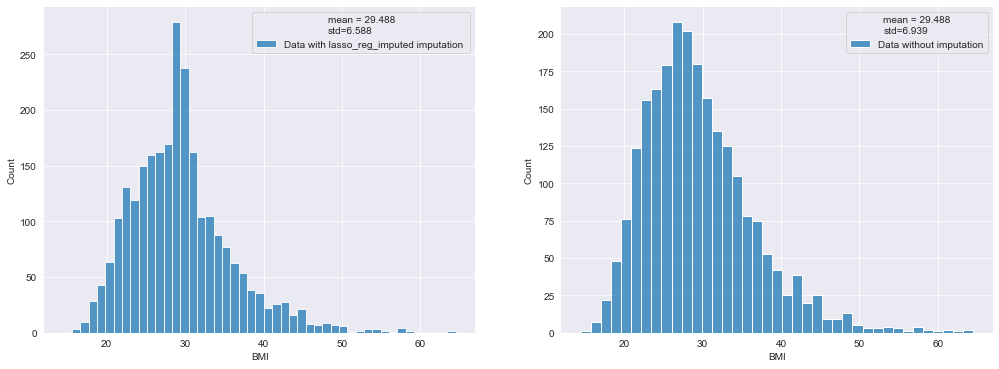

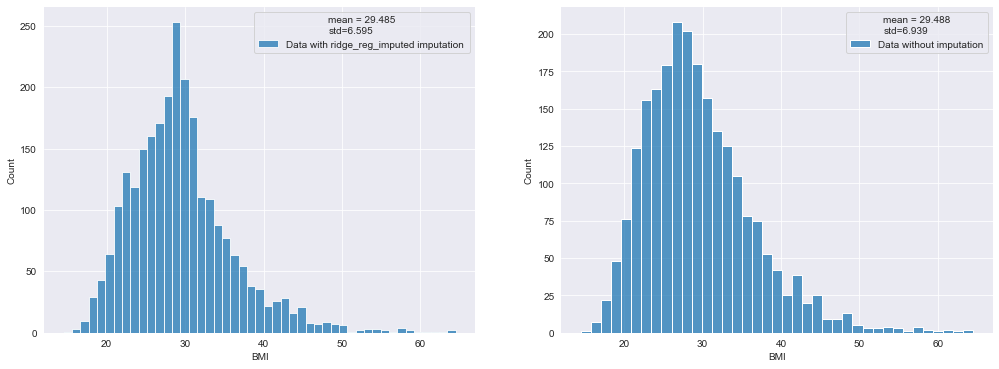

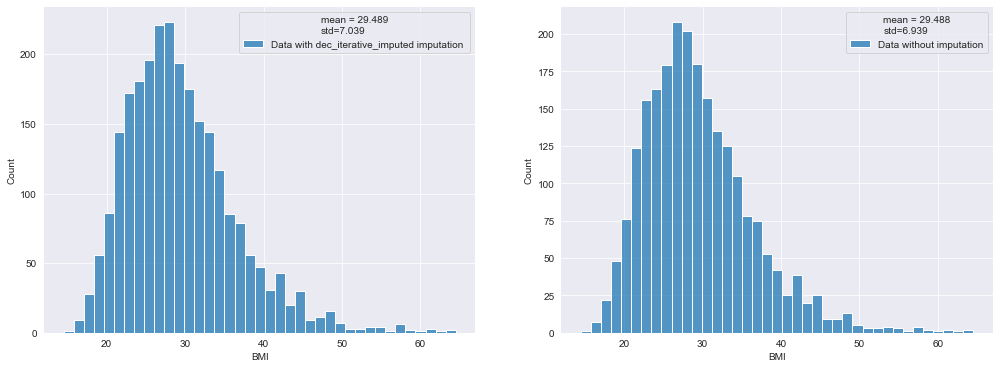

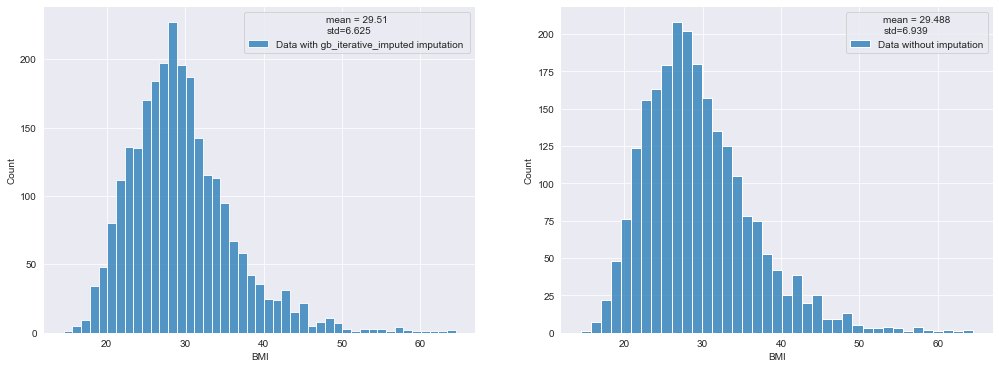

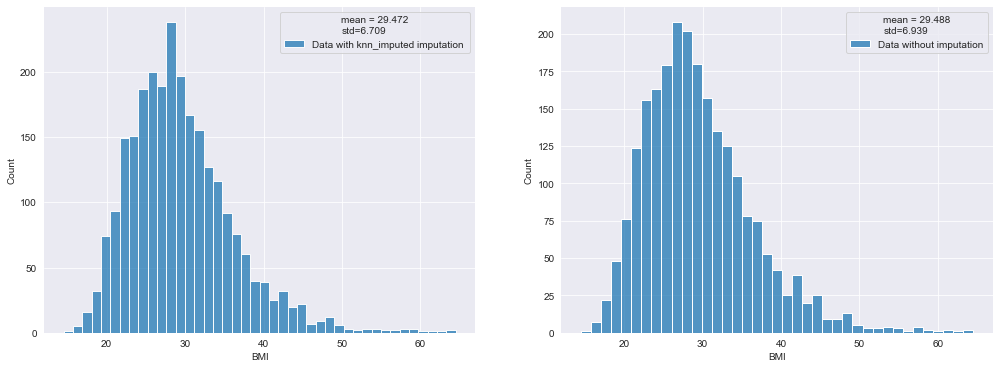

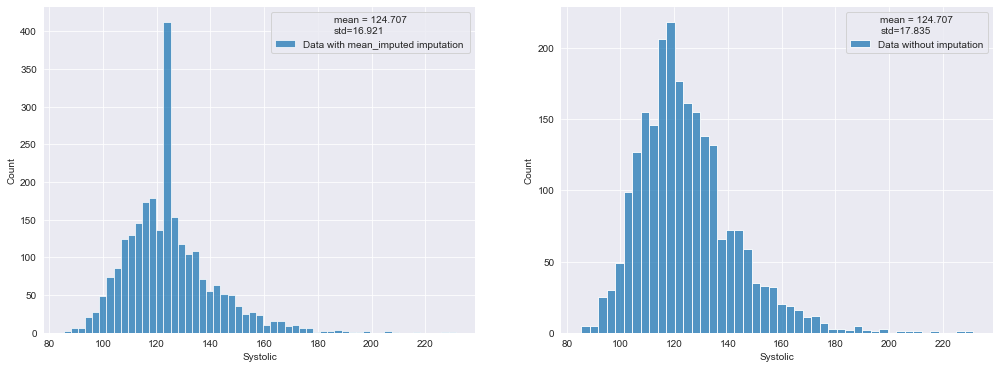

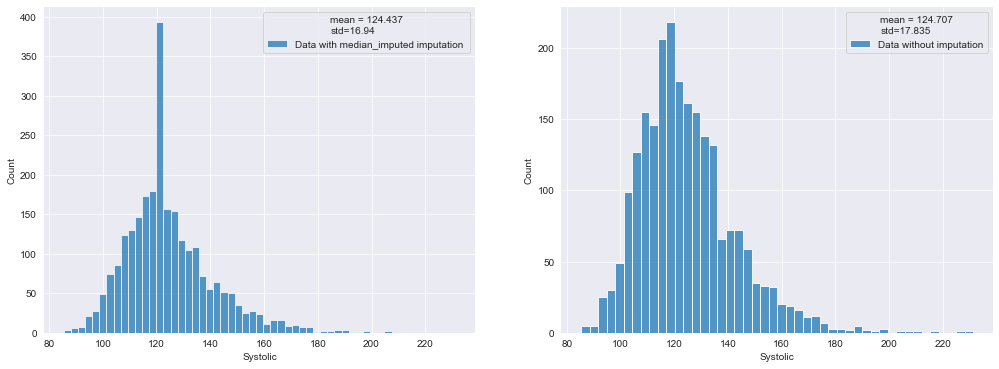

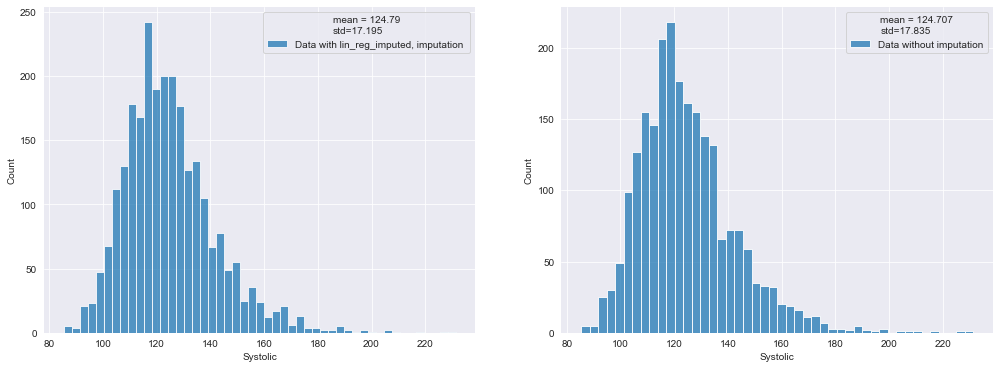

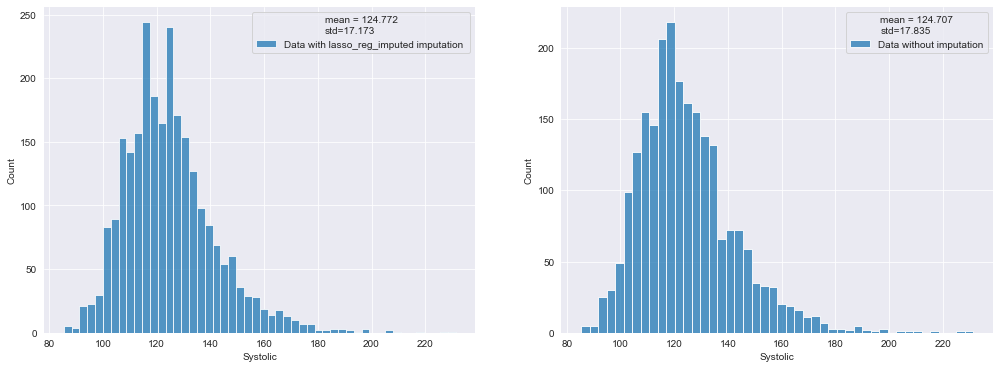

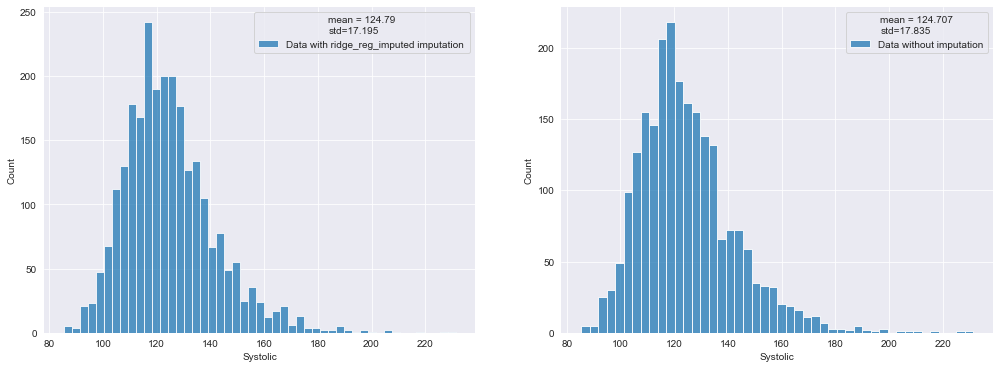

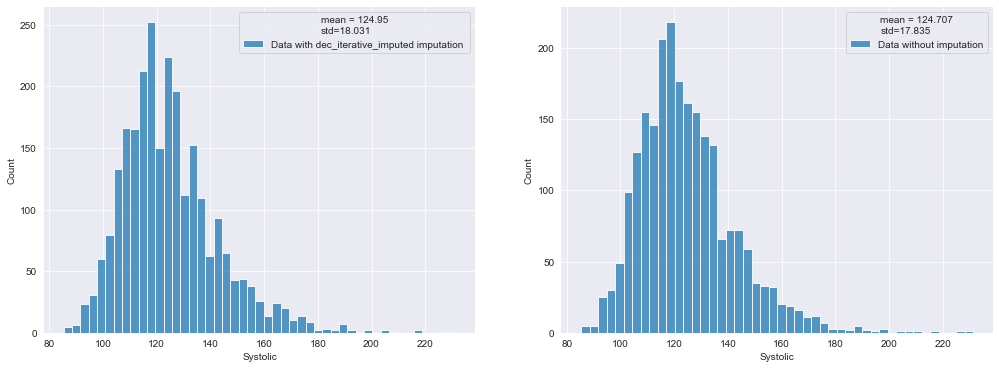

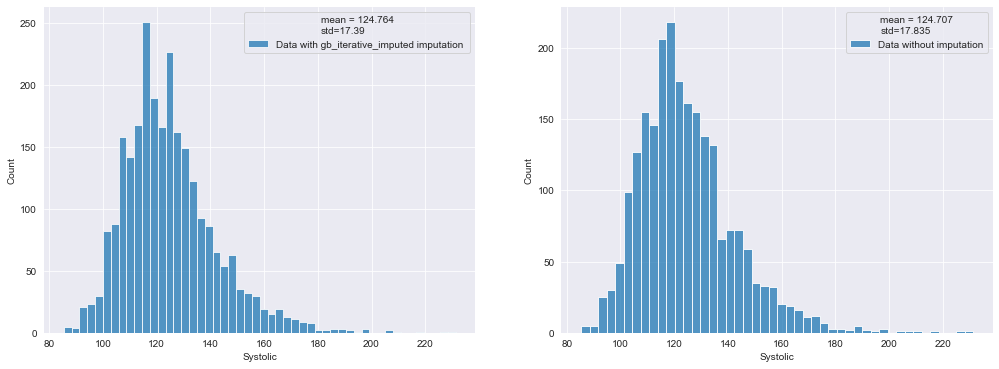

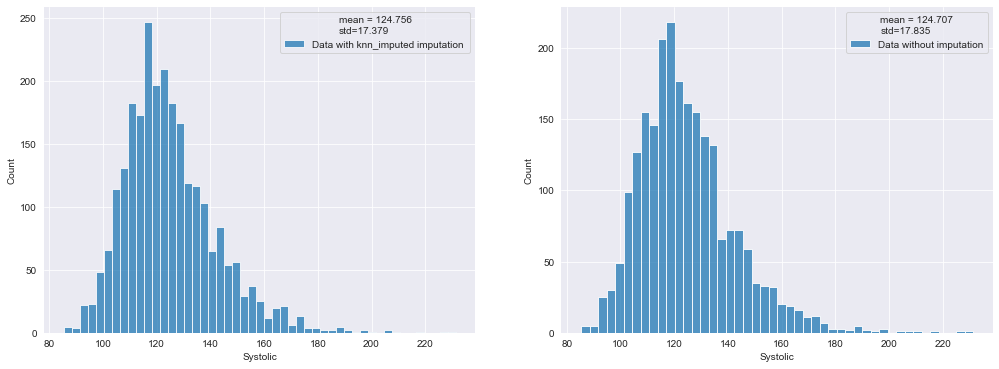

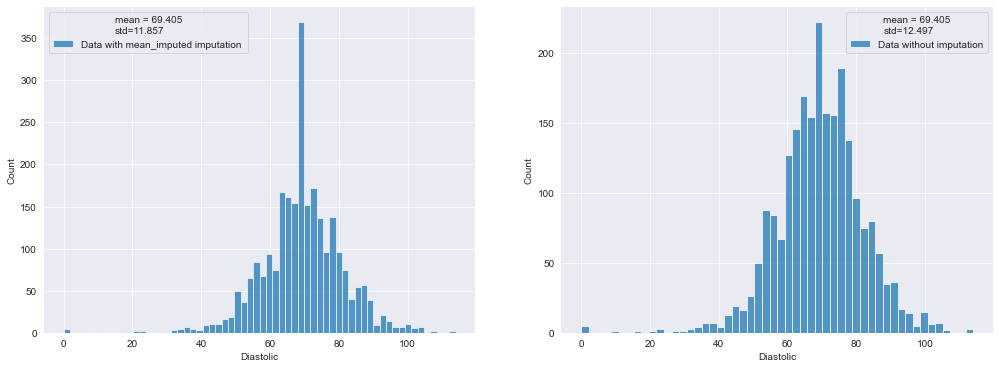

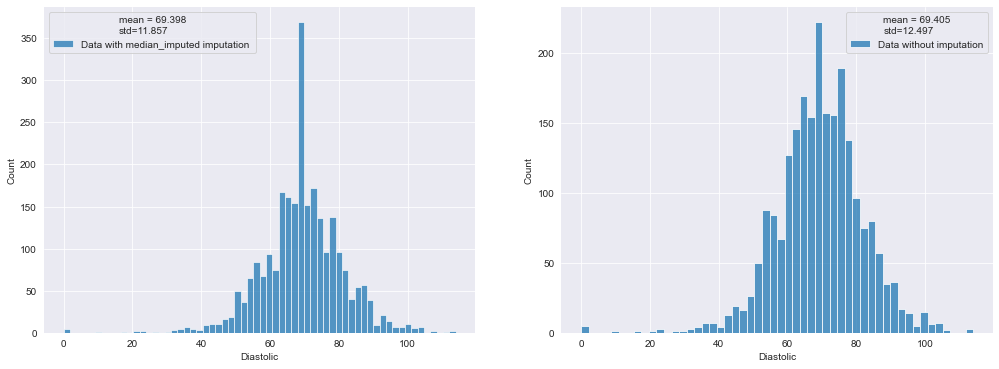

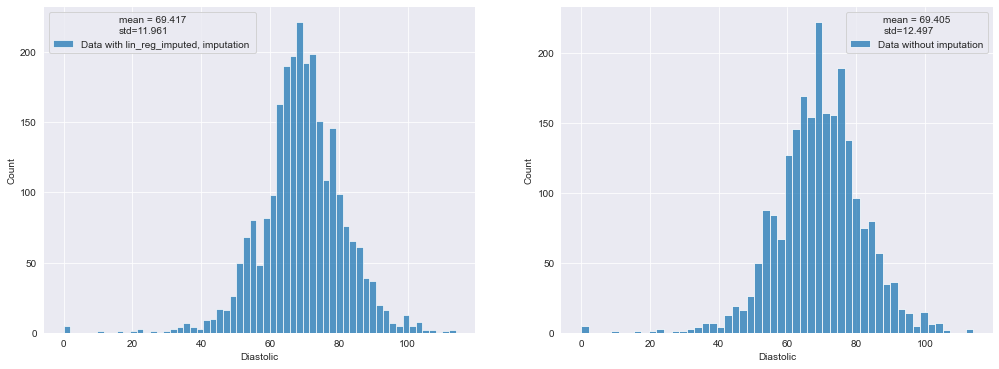

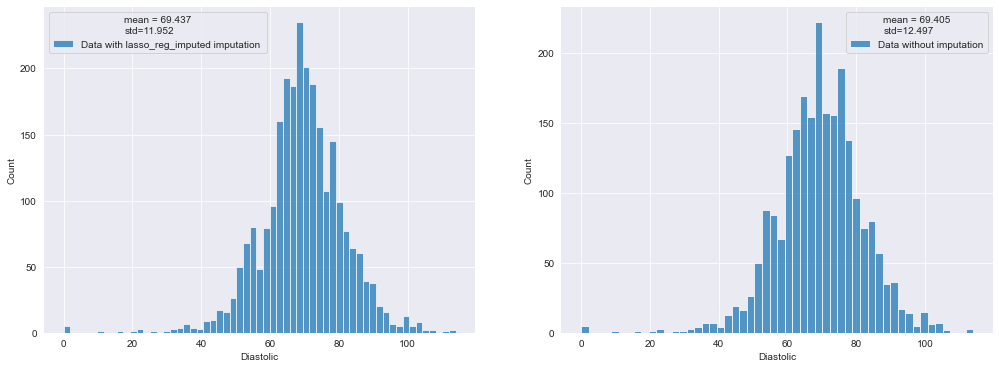

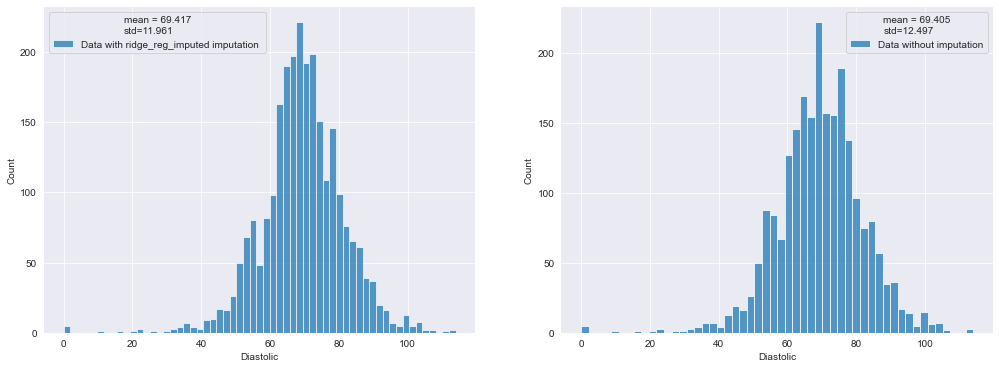

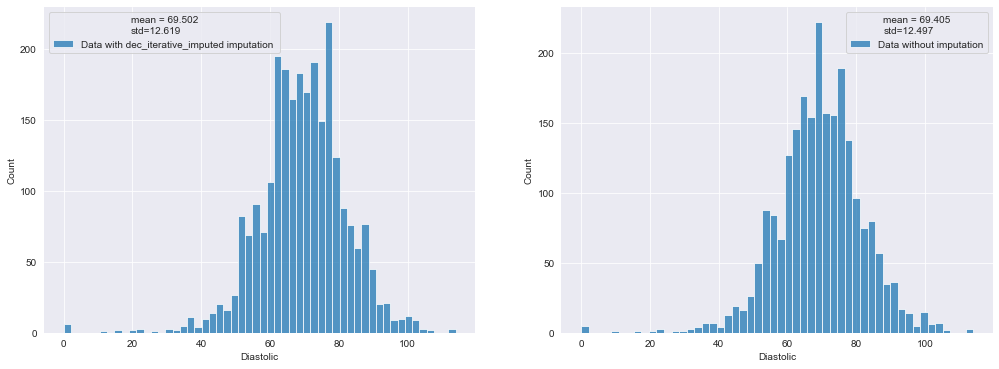

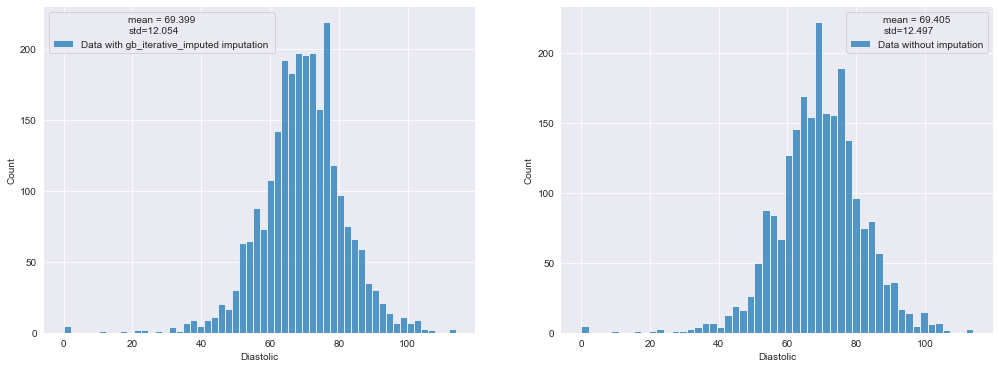

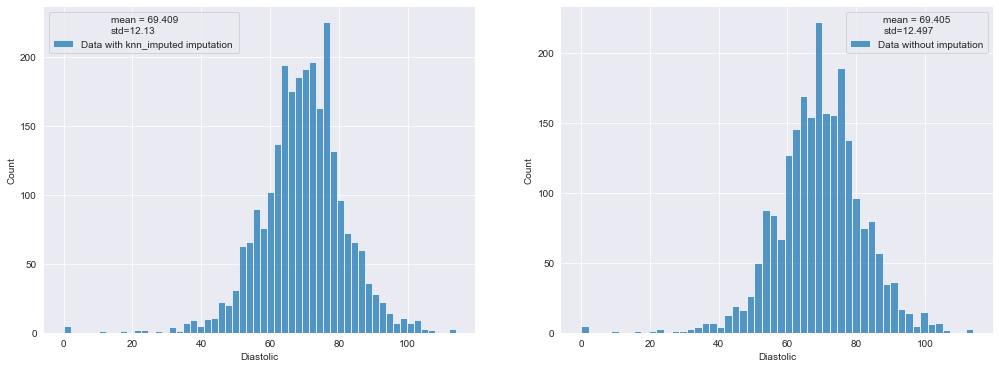

Feature           Imputed type        MAE        RMSE
0         BMI           mean_imputed   5.915041   63.924696
1         BMI         median_imputed   5.848047   66.182852
2         BMI       lin_reg_imputed,   5.644401   59.000147
3         BMI      lasso_reg_imputed   5.833207   61.835049
4         BMI      ridge_reg_imputed   5.644584   59.002058
5         BMI  dec_iterative_imputed   8.420313  121.686875
6         BMI   gb_iterative_imputed   5.544633   53.787559
7         BMI            knn_imputed   6.341797   73.896228
8    Systolic           mean_imputed  13.327115  324.347062
9    Systolic         median_imputed  13.476565  340.467130
10   Systolic       lin_reg_imputed,  11.101972  226.657483
11   Systolic      lasso_reg_imputed  11.026460  222.373313
12   Systolic      ridge_reg_imputed  11.101782  226.647147
13   Systolic  dec_iterative_imputed  15.622398  437.126891
14   Systolic   gb_iterative_imputed  10.665022  217.421887
15   Systolic            knn_imputed  12.388022  281.203256
16  Diastolic           mean_imputed   8.744172  147.631724
17  Diastolic         median_imputed   8.752603  147.737841
18  Diastolic       lin_reg_imputed,   8.173345  133.613566
19  Diastolic      lasso_reg_imputed   8.165680  130.715045
20  Diastolic      ridge_reg_imputed   8.173313  133.612045
21  Diastolic  dec_iterative_imputed  11.393229  262.189234
22  Diastolic   gb_iterative_imputed   8.119498  135.915838
23  Diastolic            knn_imputed   9.364584  181.363428

In [21]:
def compare_imputation_errors(df, impute_cols, target, test_size):

    X_train, X_test,_,_  = train_test_split(df[df.columns[~df.columns.isin([target])]], 
                                                df['HSCRP_cat'],test_size=0.3, random_state=42) 
                                                
    #take in data with missing values, drop missing values and make copy
    no_null_df  = X_train.dropna()
    to_null_df = no_null_df.copy()

    
    #randomly drop some true values (30%) but use index to access data
    impute_col_index_dict = {}
    for col in impute_cols:
        impute_col_index= to_null_df[col].dropna(inplace=False).sample(frac=test_size).index
        impute_col_index_dict[col] = impute_col_index
        to_null_df.loc[impute_col_index, col] = np.nan

    print(to_null_df.isna().sum())
    mean_imputed, median_imputed,lin_reg_imputed, lasso_reg_imputed,ridge_reg_imputed ,dec_iterative_imputed,gb_iterative_imputed ,knn_imputed=impute_data(to_null_df)

    imputed_dict = {"mean_imputed": mean_imputed, "median_imputed":median_imputed,"lin_reg_imputed,":lin_reg_imputed,"lasso_reg_imputed":lasso_reg_imputed,
    "ridge_reg_imputed":ridge_reg_imputed ,"dec_iterative_imputed":dec_iterative_imputed,"gb_iterative_imputed":gb_iterative_imputed ,"knn_imputed": knn_imputed}

    to_dataframe =[]
    for col in impute_cols:
        for impute_type,imputed_df in imputed_dict.items():
            fig, ax = plt.subplots(1,2, figsize=(17,6))
            ax=ax.flatten()
            sns.despine(left=True, bottom=True)
            sns.histplot(imputed_df[col], label = f"Data with {impute_type} imputation ", ax=ax[0])
            sns.histplot(to_null_df[col], label = f"Data without imputation", ax=ax[1])

            ax[0].legend(title= f"mean = {round(np.mean(imputed_df[col]),3)}\nstd={round(np.std(imputed_df[col]),3)}")
            ax[1].legend(title= f"mean = {round(np.mean(to_null_df[col]),3)}\nstd={round(np.std(to_null_df[col]),3)}")

          
         
            to_dataframe.append(
                {
                'Feature' : col,
                'Imputed type' : impute_type,
                'MAE' : mean_absolute_error(no_null_df.loc[impute_col_index_dict.get(col), col],
                            imputed_df.loc[impute_col_index_dict.get(col),col]),
                'RMSE' : mean_squared_error(no_null_df.loc[impute_col_index_dict.get(col), col],
                            imputed_df.loc[impute_col_index_dict.get(col),col], squared=True)
                }
            )
        plt.show()
    return(pd.DataFrame(to_dataframe))
    
display(compare_imputation_errors(model_df, features_to_impute, 'HSCRP_cat', 0.1))

In [23]:
model_df.to_csv('/Users/ryan/Desktop/ResearchRepo/HSCRPmlResearch/preprocessedHSCRP.csv')